<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

# EDA on Facebook Data 

<img src="https://github.com/shas2704/DS-EDA/blob/main/facebook-data.jpg?raw=true" align='center'><br/>

# Table of Contents

1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Importing Packages](#section3)<br>
4. [Loading Data](#section4)<br>
  - 4.1 [Description of the Datasets](#section401)<br>
  - 4.2 [Pandas Profiling before Data Preprocessing](#section402)<br>
5. [Data Preprocessing](#section5)<br>
  - 5.1 [Missing Values Handling](#section501)<br>
  - 5.2 [Analyzing and updating the dataFrame for better analysis](#section502)<br>  
  - 5.3 [Pandas Profiling after Data Preprocessing](#section503)<br>
6. [Exploratory Data Analysis](#section6)<br>
  - 6.1 [Visualizing the data using Histograms and Bar plots](#section601)<br>
  - 6.2 [Visualizing the data as percentage distribution](#section602)<br> 
  - 6.3 [Visualizing the activity data as percentage distribution](#section603)<br>  
  - 6.4 [Visualizing the data using Boxplots](#section604)<br>
  - 6.5 [Visualizing and analysing the activity data](#section605)<br>
  - 6.6 [Visualizing the activity data using stacked plots](#section606)<br>
7. [Conclusion](#section7)
8. [Actionable Insights](#section8)

<a id=section1></a>
# 1. Introduction

People are using different Social media platforms nowdays. Facebook is one of the most popular platform to connect with friends and family and to know about there activities. We need to figure out how people are using this popular social site.

Dataset link : https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv

<a id=section2></a>
# 2. Problem statement



Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status,thoughts and pictures with their friends. With the mobile app , it has become even more popular and easier to access. People from all age groups are connected to facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes . We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group,gender etc.

# <a id=section3></a>
# 3. Importing Packages

In [3]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

from datetime import datetime, timedelta

# <a id=section4></a>
# 4. Loading Data

In [4]:
fb_df = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")
fb_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.00,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.00,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.00,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.00,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.00,0,0,0,0,0,0,0,0


# <a id=section401></a>
## 4.1 Description of the Dataset

This dataset provides a usage analysis of various facebook users such as the tenure of their account,number of friends they have,number of friendships they have initiated , the number of likes received by them through the FB website and through the mobile app .

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| userid	                     | A numeric value uniquely identifying the user   | 
| age                            | Age of the user in years                                                                   |
| dob_day                        | Day part of the user's date of birth | 
| dob_year                       | Year part of the user's date of birth                                     |
| dob_month	                     | Month part of the user's date of birth                |
| gender                         | Gender of the user                                             |
| tenure                         | Number of days since the user has been on FB              |
| friend_count                   | Number of friends the user has |
| friendships_initiated          | Number of friendships initiated by the user                                                |
| likes                          | Total number of posts liked by the user  | 
| likes_received	             | Total Number of likes received by user's posts                                  |
| mobile_likes	                 | Number of posts liked by the user through mobile app                |
| mobile_likes_received          | Number of likes received by user through mobile app                                       |
| www_likes                      | Number of posts liked by the user through web              |
| www_likes_received	         | Number of likes received by user through web |

In [5]:
#checking the info
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

 - ```info``` function gives us the following insights into the facebook_df dataframe:

  - There are a total of **99003 samples (rows)** and **15 columns** in the dataframe.
  
  - There are **14 columns** with a **numeric** datatype(13 integers and 1 float) and **1 columns** with an **object** datatype.
  
  - There are **missing** values in the data in columns **gender & tenure**.

In [6]:
#facebook_df.describe(include=all)
fb_df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.00,99003.00,99003.00,99003.00,99003.00,99001.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00,99003.00
mean,1597045.21,37.28,14.53,1975.72,6.28,537.89,196.35,107.45,156.08,142.69,106.12,84.12,49.96,58.57
std,344059.18,22.59,9.02,22.59,3.53,457.65,387.30,188.79,572.28,1387.92,445.25,839.89,285.56,601.42
min,1000008.00,13.00,1.00,1900.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1298805.50,20.00,7.00,1963.00,3.00,226.00,31.00,17.00,1.00,1.00,0.00,0.00,0.00,0.00
50%,1596148.00,28.00,14.00,1985.00,6.00,412.00,82.00,46.00,11.00,8.00,4.00,4.00,0.00,2.00
75%,1895744.00,50.00,22.00,1993.00,9.00,675.00,206.00,117.00,81.00,59.00,46.00,33.00,7.00,20.00
max,2193542.00,113.00,31.00,2000.00,12.00,3139.00,4923.00,4144.00,25111.00,261197.00,25111.00,138561.00,14865.00,129953.00


  - ```describe``` function gives us the following insights into the data:
  
  - There are **no duplicates**
  
  - The distribution of **age, tenure** are  **moderately positive (right) skewed** because the **mean** lies to the **right** of the **median(50%)** value , on a **distribution plot**. 
  
   - The distribution of **friend_count & friendship_initiated** are **highly positive (right) skewed** because the **mean** is more then **50 to 100 times** of the **median(50%)** value , on a **distribution plot**. 
  
  - The **max** value of **last 6 columns** are an **outlier i.e. extremely positive (right) skewed** because it lie far away from the mean.
  
  - Similarly comparing the **75%** and **max** values of the **last 6 columns**  we can see that there are **outliers** present all these columns.

In [213]:
print(fb_df['friend_count'].quantile(0.10))
print(fb_df['friend_count'].quantile(0.99))
print(fb_df['friendships_initiated'].quantile(0.10))
print(fb_df['friendships_initiated'].quantile(0.99))
print(fb_df['likes'].quantile(0.10))
print(fb_df['likes'].quantile(0.99))
print(fb_df['likes_received'].quantile(0.10))
print(fb_df['likes_received'].quantile(0.99))

9.0
1918.9199999999837
5.0
932.0
0.0
2382.979999999996
0.0
2133.979999999996


In [212]:
temp = fb_cln[fb_cln['friend_count'] > 1918]
temp

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_grp,tenure_grp,mbl_act,web_act
98004,1299284,15,29,1998,3,female,437.00,3820,1834,0,778,0,123,0,655,<18,1Y-2Y,123,655
98005,1883270,18,14,1995,11,female,341.00,2050,467,0,0,0,0,0,0,<18,6M-1Y,0,0
98006,2000570,19,14,1994,11,female,588.00,2166,767,0,21,0,17,0,4,18-24,1Y-2Y,17,4
98007,1009782,18,5,1995,3,female,270.00,3160,1165,0,18,0,18,0,0,<18,6M-1Y,18,0
98008,1170092,18,1,1995,5,male,258.00,1921,1684,0,2,0,1,0,1,<18,6M-1Y,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.00,2118,341,3996,18089,3505,11887,491,6202,65-74,1Y-2Y,15392,6693
98999,1256153,18,12,1995,3,female,21.00,1968,1720,4401,13412,4399,10592,2,2820,<18,<1M,14991,2822
99000,1195943,15,10,1998,5,female,111.00,2002,1524,11959,12554,11959,11462,0,1092,<18,3M-6M,23421,1092
99001,1468023,23,11,1990,4,female,416.00,2560,185,4506,6516,4506,5760,0,756,18-24,1Y-2Y,10266,756


In [226]:
fb_cln[fb_cln['likes_received'] > 20000]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_grp,tenure_grp,mbl_act,web_act
49230,1432020,20,12,1993,1,male,245.00,79,50,477,53534,78,30387,399,23147,18-24,6M-1Y,30465,23546
77121,1441676,20,5,1993,8,female,253.00,230,73,2078,178166,1982,138561,96,39605,18-24,6M-1Y,140543,39701
94906,1674584,17,14,1996,8,female,401.00,818,395,1016,261197,659,131244,357,129953,<18,1Y-2Y,131903,130310
96999,1267229,24,14,1989,9,female,484.00,1171,695,14799,22513,12934,17955,1865,4558,18-24,1Y-2Y,30889,6423
97694,1314104,19,7,1994,4,female,1552.00,1401,319,714,28053,346,18648,368,9405,18-24,2Y-5Y,18994,9773
97942,1568305,28,14,1985,6,female,484.00,1539,954,2914,24229,2913,16072,1,8157,25-34,1Y-2Y,18985,8158
97958,1386285,18,15,1995,9,female,443.00,1567,663,5620,20704,220,9694,5400,11010,<18,1Y-2Y,9914,16410
97990,1554413,18,19,1995,3,female,1075.00,1848,850,12172,30222,10479,16944,1693,13278,<18,2Y-5Y,27423,14971
98686,1015907,74,27,1939,11,male,832.00,4630,831,966,39536,941,10199,25,29337,65-74,2Y-5Y,11140,29362
98773,2042824,18,25,1995,1,male,51.00,4817,32,1346,52964,1342,18925,4,34039,<18,1M-3M,20267,34043


# <a id=section402></a>
## 4.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __fb_df_profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [1]:
# To install pandas profiling please run this command.
!pip install pandas-profiling --user 

In [16]:
import pandas_profiling 

In [9]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = pandas_profiling.ProfileReport(fb_df)
profile.to_file(output_file="fb_df_profiling_before_preprocessing.html")


# To output the pandas profiling report on the notebook.

# fb_df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

**Dataset statistics**

Number of variables	15

Number of observations	99003

Missing cells	177

Missing cells (%)	< 0.1%

Duplicate rows	0

Duplicate rows (%)	0.0%

Total size in memory	11.3 MB

Average record size in memory	120.0 B

**Variable types**

NUM	14

CAT	1

**Warnings**

dob_year is highly correlated with age	High correlation - **No Issues - Expected Behaviour**

age is highly correlated with dob_year	High correlation - **No Issues - Expected Behaviour**

mobile_likes_received is highly correlated with likes_received	High correlation - **No Issues - Expected Behaviour**

likes_received is highly correlated with mobile_likes_received and 1 other fields	High correlation - **No Issues - Expected Behaviour**

www_likes_received is highly correlated with likes_received	High correlation - **No Issues - Expected Behaviour**

likes_received is highly skewed (γ1 = 112.0745682)	Skewed - **No Issues - Shows that very few users are Active**

mobile_likes_received is highly skewed (γ1 = 107.5312999)	Skewed - **No Issues - Expected Behaviour**

www_likes_received is highly skewed (γ1 = 126.257317)	Skewed - **No Issues - Expected Behaviour**

userid has unique values	Unique - **No Issues - Expected Behaviour**

friend_count has 1962 (2.0%) zeros	Zeros - **No Issues - Shows that very few users have no friends**

friendships_initiated has 2997 (3.0%) zeros	Zeros - **No Issues - Shows that very few users have not initiated any freindship request**

likes has 22308 (22.5%) zeros	Zeros - **No Issues - Shows that 22.5% users have not liked anything on facebook ie they are not active**

likes_received has 24428 (24.7%) zeros	Zeros  - **No Issues - Shows that 24.7% users have not received any like on facebook ie they are not active**

mobile_likes has 35056 (35.4%) zeros	Zeros - **No Issues - Shows that 35.4% users have not initiated any likes on facebook using their mobile devices and hence they are not active on mobile devices**

mobile_likes_received has 30003 (30.3%) zeros	Zeros - **No Issues - Shows that 30.3% users have not received any like on facebook app on their mobile devices and hence they are not active on mobile devices**

www_likes has 60999 (61.6%) zeros	Zeros - **No Issues - Shows that 61.6% users have not initiated any likes on facebook using their website and hence they are not active on website**

www_likes_received has 36864 (37.2%) zeros	Zeros - **No Issues - Shows that 37.2% users have not received any like on facebook website ie they are not active**



# <a id=section5></a>
# 5. Data Preprocessing

<a id=section501></a>
## 5.1 Missing values handling

We'll start by checking the **missing values** rows.

In [5]:
#Finding rows with missing values
fb_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.00,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.00,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.00,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.00,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.00,0,0,0,0,0,0,0,0


In [6]:
fb_df['gender'].describe()

count     98828
unique        2
top        male
freq      58574
Name: gender, dtype: object

In [7]:
fb_df[fb_df['gender'].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.00,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.00,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.00,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.00,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.00,5,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94778,1748557,68,27,1945,4,NaN,1862.00,790,435,422,425,410,318,12,107
95317,2173780,50,11,1963,9,NaN,2129.00,863,389,49,781,24,327,25,454
95479,1442490,108,1,1905,7,NaN,1332.00,967,537,150,1311,76,671,74,640
97530,2119521,74,26,1939,9,NaN,1998.00,1609,348,313,834,179,696,134,138


We see **175 rows have missing gender values**. Since analysis have to be done on gender basis and the record count is very low. We can drop these rows.
Other option was to **replace them propotinally with exsisitng gender distribution.** But since records are less droping them makes more sense.

In [8]:
fb_df[fb_df['tenure'].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
35057,1414063,88,14,1925,12,female,nan,48,41,18,5,17,3,1,2
63979,2095829,103,1,1910,1,female,nan,137,52,110,74,0,21,110,53


Here we see **tenure is missing for 2 values** . One option is to replace by mean value. But **since the sample size is just 2 rows only**, we will drop these 2 rows too.

So total we **dropped 177 rows** from the total rows.  **Created a new df to work on.**

In [8]:
fb_cln = fb_df.dropna()

In [10]:
fb_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 98826 non-null  int64  
 1   age                    98826 non-null  int64  
 2   dob_day                98826 non-null  int64  
 3   dob_year               98826 non-null  int64  
 4   dob_month              98826 non-null  int64  
 5   gender                 98826 non-null  object 
 6   tenure                 98826 non-null  float64
 7   friend_count           98826 non-null  int64  
 8   friendships_initiated  98826 non-null  int64  
 9   likes                  98826 non-null  int64  
 10  likes_received         98826 non-null  int64  
 11  mobile_likes           98826 non-null  int64  
 12  mobile_likes_received  98826 non-null  int64  
 13  www_likes              98826 non-null  int64  
 14  www_likes_received     98826 non-null  int64  
dtypes:

Now we have **99826 rows** with no missing values. We will continue with updated dataframe.

There are too many **Zeroes** in columns **likes, likes_received, mobile_likes, mobile_likes_received, www_likes & www_likes_received**

Let us analyze these columns to get more insights.

<a id=section502></a>
## 5.2 Analyzing and updating the dataFrame for better analysis

We'll start by **Checking if old people are not active and can be dropped as outliers**. 

In [9]:
# Analyzing the old people data to see any descripancy
fb_old = fb_cln[fb_cln['age'] > 90]
fb_old.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00,4841.00
mean,1594290.70,103.59,14.62,1909.41,6.23,1085.20,394.42,189.89,154.77,131.82,97.52,82.30,57.25,49.53
std,342287.86,5.27,9.43,5.27,3.68,616.00,573.03,246.11,468.96,540.79,385.82,450.71,215.29,147.40
min,1000015.00,91.00,1.00,1900.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1295526.00,101.00,6.00,1905.00,3.00,594.00,99.00,47.00,5.00,5.00,0.00,2.00,0.00,1.00
50%,1596416.00,103.00,14.00,1910.00,6.00,1087.00,223.00,109.00,30.00,24.00,9.00,13.00,1.00,7.00
75%,1889792.00,108.00,23.00,1912.00,10.00,1532.00,457.00,235.00,126.00,100.00,59.00,56.00,26.00,35.00
max,2193090.00,113.00,31.00,1922.00,12.00,3139.00,4923.00,2868.00,11696.00,19674.00,10937.00,17624.00,5009.00,2478.00


In [10]:
#Checking if old people are not active and can be dropped as outliers
fb_old[fb_old['friend_count'] != 0]


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3127,1897956,93,1,1920,1,male,177.00,1,1,0,0,0,0,0,0
3128,1697718,101,9,1912,6,male,151.00,1,0,0,0,0,0,0,0
3129,2180884,102,1,1911,1,male,1820.00,1,0,0,0,0,0,0,0
3130,1652149,103,1,1910,1,male,545.00,1,1,0,0,0,0,0,0
3131,1612500,103,10,1910,5,male,68.00,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98895,2008877,108,23,1905,4,male,1587.00,2460,1158,2753,593,2694,327,59,266
98903,2085281,96,28,1917,6,male,999.00,3738,1705,2952,3857,2223,2709,729,1148
98923,1761484,103,18,1910,3,female,560.00,3018,547,5595,1926,586,810,5009,1116
98934,2115451,108,18,1905,5,female,954.00,3982,1190,6016,4012,1180,2816,4836,1196


#### Age and data are good with no anomilies. Alsmost all users (4831 out of 4841) have at least 1 friend.
#### Hence will keep this data as it is.

Now will add **age groups** to catergorize the data for better analysis

In [11]:
# Categorizing the age in relevant group (10 numbers) for analysis in new df

fb_cln['age_grp'] = pd.cut(fb_cln['age'],
                      [0,18,25,35,45,55,65,75,85,100, 115],
                      labels=['<18','18-24','25-34','35-44','45-54','55-64','65-74','75-84','85-99','100+'], include_lowest=True)

In [20]:
fb_cln.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_grp
98998,1268299,68,4,1945,4,female,541.00,2118,341,3996,18089,3505,11887,491,6202,65-74
98999,1256153,18,12,1995,3,female,21.00,1968,1720,4401,13412,4399,10592,2,2820,<18
99000,1195943,15,10,1998,5,female,111.00,2002,1524,11959,12554,11959,11462,0,1092,<18
99001,1468023,23,11,1990,4,female,416.00,2560,185,4506,6516,4506,5760,0,756,18-24
99002,1397896,39,15,1974,5,female,397.00,2049,768,9410,12443,9410,9530,0,2913,35-44


Now will add **Tenure groups** to catergorize the data for better analysis

In [12]:
# Categorizing the tenure in relevant group (7 numbers) for analysis in new df


fb_cln['tenure_grp'] = pd.cut(fb_cln['tenure'],
                      [0,30,90,180,365,730,1803,3650],
                      labels=['<1M','1M-3M','3M-6M','6M-1Y','1Y-2Y','2Y-5Y','5Y+'], include_lowest=True)

In [23]:
fb_cln.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_grp,tenure_grp
98998,1268299,68,4,1945,4,female,541.00,2118,341,3996,18089,3505,11887,491,6202,65-74,1Y-2Y
98999,1256153,18,12,1995,3,female,21.00,1968,1720,4401,13412,4399,10592,2,2820,<18,<1M
99000,1195943,15,10,1998,5,female,111.00,2002,1524,11959,12554,11959,11462,0,1092,<18,3M-6M
99001,1468023,23,11,1990,4,female,416.00,2560,185,4506,6516,4506,5760,0,756,18-24,1Y-2Y
99002,1397896,39,15,1974,5,female,397.00,2049,768,9410,12443,9410,9530,0,2913,35-44,1Y-2Y


**Adding new column mbl_act** to track the mobile app activity done i.e. how many likes through mobile app and how many likes received through mobile app.

**Adding new column web_act** to track the web activity done i.e. how many likes through website and how many likes received through website.

In [13]:
fb_cln['mbl_act'] = fb_cln['mobile_likes'] + fb_cln['mobile_likes_received']
fb_cln['web_act'] = fb_cln['www_likes'] + fb_cln['www_likes_received']
fb_cln.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_grp,tenure_grp,mbl_act,web_act
98998,1268299,68,4,1945,4,female,541.00,2118,341,3996,18089,3505,11887,491,6202,65-74,1Y-2Y,15392,6693
98999,1256153,18,12,1995,3,female,21.00,1968,1720,4401,13412,4399,10592,2,2820,<18,<1M,14991,2822
99000,1195943,15,10,1998,5,female,111.00,2002,1524,11959,12554,11959,11462,0,1092,<18,3M-6M,23421,1092
99001,1468023,23,11,1990,4,female,416.00,2560,185,4506,6516,4506,5760,0,756,18-24,1Y-2Y,10266,756
99002,1397896,39,15,1974,5,female,397.00,2049,768,9410,12443,9410,9530,0,2913,35-44,1Y-2Y,18940,2913


In [14]:
fb_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   userid                 98826 non-null  int64   
 1   age                    98826 non-null  int64   
 2   dob_day                98826 non-null  int64   
 3   dob_year               98826 non-null  int64   
 4   dob_month              98826 non-null  int64   
 5   gender                 98826 non-null  object  
 6   tenure                 98826 non-null  float64 
 7   friend_count           98826 non-null  int64   
 8   friendships_initiated  98826 non-null  int64   
 9   likes                  98826 non-null  int64   
 10  likes_received         98826 non-null  int64   
 11  mobile_likes           98826 non-null  int64   
 12  mobile_likes_received  98826 non-null  int64   
 13  www_likes              98826 non-null  int64   
 14  www_likes_received     98826 non-null 

# <a id=section503></a>
## 5.3 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our new and cleaned dataset, so we will name the **output file** as __fb_df_profiling_after_preprocessing.html__.

In [17]:
# To output pandas profiling report to an external html file.
# Saving the output as fb_df_profiling_after_preprocessing.html

profile = pandas_profiling.ProfileReport(fb_cln)
profile.to_file(output_file="fb_df_profiling_after_preprocessing.html")


# To output the pandas profiling report on the notebook.

# fb_df.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

# <a id=section6></a>
## 6. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting, parsimonious model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

# <a id=section601></a>
## 6.1 Visualising the data using Histograms and Bar plots

User analysis **based on Gender, Age Group and Tenure grouping**

##### Lets start with user count distribution based on Gender

Text(0.5, 0, 'Gender')

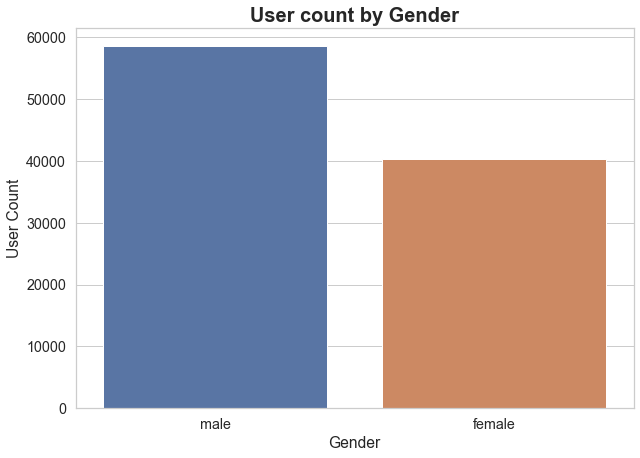

In [20]:
#sns.countplot(x='gender', data=fb_cln).set_title('Count plot for gender.')

plt.figure(figsize=(10,7))
sns.countplot(x='gender', data = fb_cln)
plt.title("User count by Gender",fontsize=20,fontweight="bold")
plt.ylabel("User Count")
plt.xlabel("Gender")

##### Here we observe following things - 
- There are **more Male users than Female users**.

##### Visualizing with user count distribution based on Age Group

Text(0.5, 0, 'Age Group')

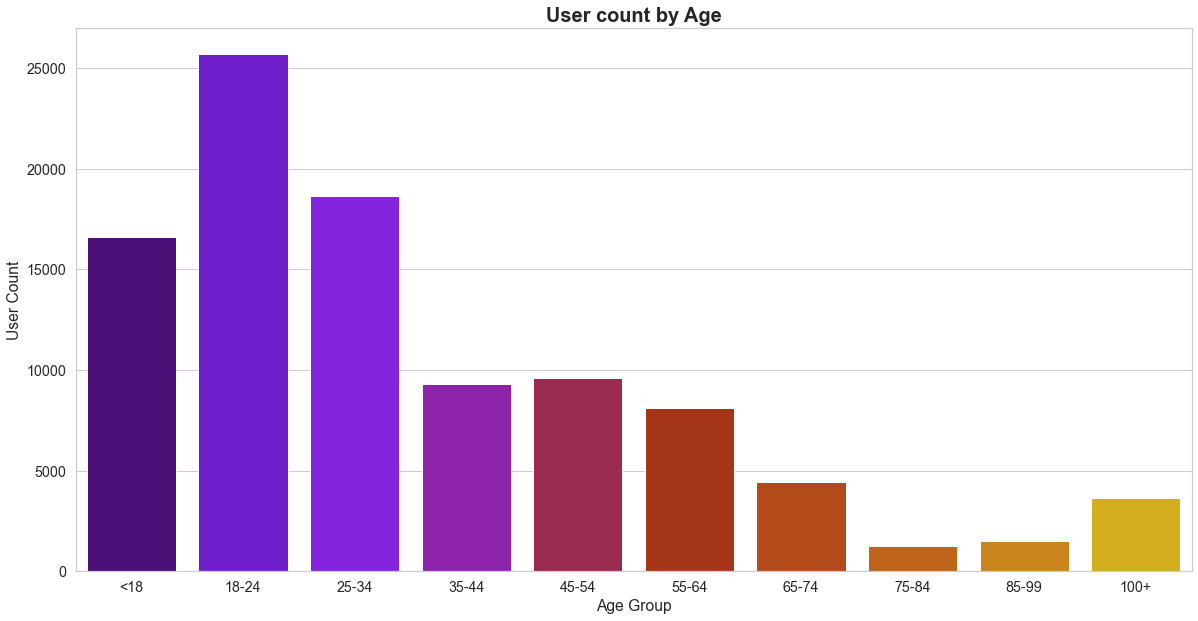

In [112]:

plt.figure(figsize=(20,10))
sns.countplot('age_grp', data = fb_cln, palette="gnuplot")
plt.title("User count by Age",fontsize=20,fontweight="bold")
plt.ylabel("User Count")
plt.xlabel("Age Group")

##### Here we observe following things - 

- **Most user counts** are in Age group **between 18 yrs to 24 Yrs**.

##### Visualizing with user count distribution based on Tenure

Text(0.5, 0, 'Tenure of Users')

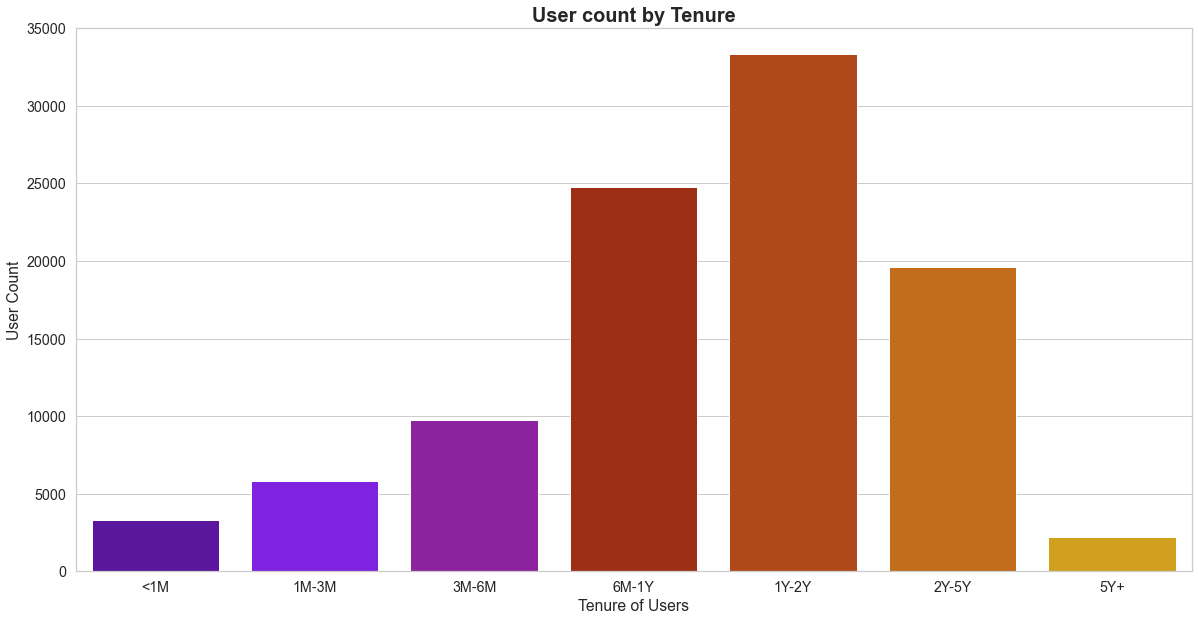

In [71]:
plt.figure(figsize=(20,10))
sns.countplot('tenure_grp', data = fb_cln, palette="gnuplot")
plt.title("User count by Tenure",fontsize=20,fontweight="bold")
plt.ylabel("User Count")
plt.xlabel("Tenure of Users")

##### Here we observe following things - 
- **Most user counts** are in Tenure group **between 1 yrs to 2 Yrs**.

In [ ]:
age_grp#print(fb_cln.groupby(['gender', 'age_grp']).mean())
#print(fb_cln.groupby([ 'age_grp']).mean())
print(fb_cln.groupby(['gender']).mean())

In [ ]:
fb_cln.groupby(['gender']).agg(['mean']) \
[['friend_count', 'friendships_initiated', 'likes', 'likes_received', 'mobile_likes', 'mobile_likes_received','www_likes', 'www_likes_received']]


In [22]:
# Finding records where total like is not equal to likes done on www and mobile. Ideally they should match.
fb_cln[fb_cln['likes'] != fb_cln['mobile_likes'] + fb_cln['www_likes']]

#4 such rows dentified. Sample size is very less and so is the difference. So ignoring the data mismatch in these 4 rows.

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_grp,tenure_grp,mbl_act,web_act
27607,1930804,41,22,1972,1,female,782.00,35,14,176,159,174,142,0,17,35-44,2Y-5Y,316,17
90002,1030735,21,9,1992,4,male,373.00,473,409,896,136,895,113,0,23,18-24,1Y-2Y,1008,23
93007,1535515,23,2,1990,1,female,510.00,629,440,1298,1522,1216,1172,81,350,18-24,1Y-2Y,2388,431
98827,1182272,17,16,1996,12,female,1082.00,4464,1716,2049,17159,681,9657,1367,7502,<18,2Y-5Y,10338,8869


In [23]:
# Finding records where total likes received is not equal to likes received on www and mobile. Ideally they should match.
fb_cln[fb_cln['likes_received'] != fb_cln['mobile_likes_received'] + fb_cln['www_likes_received']]


#4 such rows dentified. Sample size is very less and so is the difference. So ignoring the data mismatch in these 4 rows.

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_grp,tenure_grp,mbl_act,web_act
83113,1670016,14,23,1999,5,female,32.00,293,174,3423,2222,2581,1847,842,374,<18,1M-3M,4428,1216
90680,2088542,80,8,1933,5,female,1704.00,501,221,138,65,99,55,39,9,75-84,2Y-5Y,154,48
96931,1698567,19,17,1994,2,female,600.00,1028,754,1916,1292,1672,722,244,569,18-24,1Y-2Y,2394,813
98981,1277820,17,27,1996,11,female,1005.00,4351,2210,5045,4498,4742,3909,303,588,<18,2Y-5Y,8651,891


##### Visualizing with user count distribution based on Gender & Age Group 

Text(0.5, 0, 'Age group of Users')

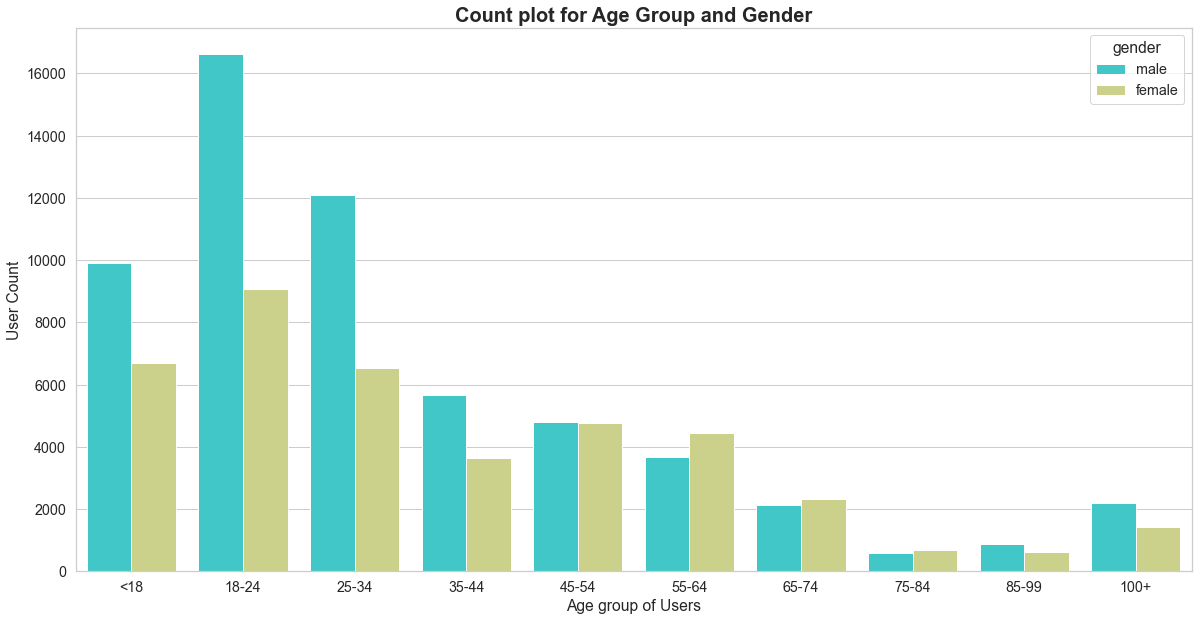

In [113]:
plt.figure(figsize=(20,10))
sns.countplot(x='age_grp', data=fb_cln, hue='gender', palette="rainbow")
plt.title("Count plot for Age Group and Gender",fontsize=20,fontweight="bold")
plt.ylabel("User Count")
plt.xlabel("Age group of Users")


##### Here we observe following things - 
- **Most user counts** are in Age group **between 18 yrs to 24 Yrs**.

- **Most Male and female user counts** are in in Age group **between 18 yrs to 24 Yrs**.

##### Visualizing with user count distribution based on Gender & Tenure

Text(0.5, 0, 'Tenure of Users')

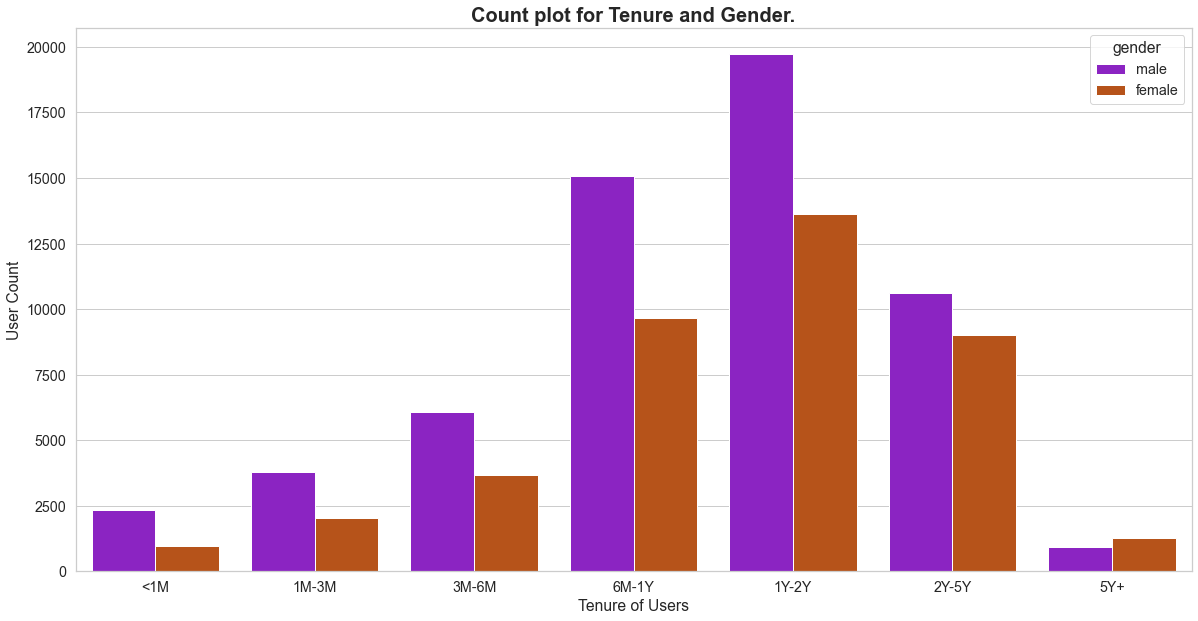

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='tenure_grp', hue='gender', data=fb_cln, palette="gnuplot")
plt.title("Count plot for Tenure and Gender.",fontsize=20,fontweight="bold")
plt.ylabel("User Count")
plt.xlabel("Tenure of Users")

##### Here we observe following things - 
- **Most user counts** are in Tenure group **between 1 yrs to 2 Yrs**.

- **Most Male and female user counts** are in Tenure group **between 1 yrs to 2 Yrs**.

##### Visualizing with user count distribution based on Tenure & Age Group 

Text(0.5, 0, 'Tenure of Users')

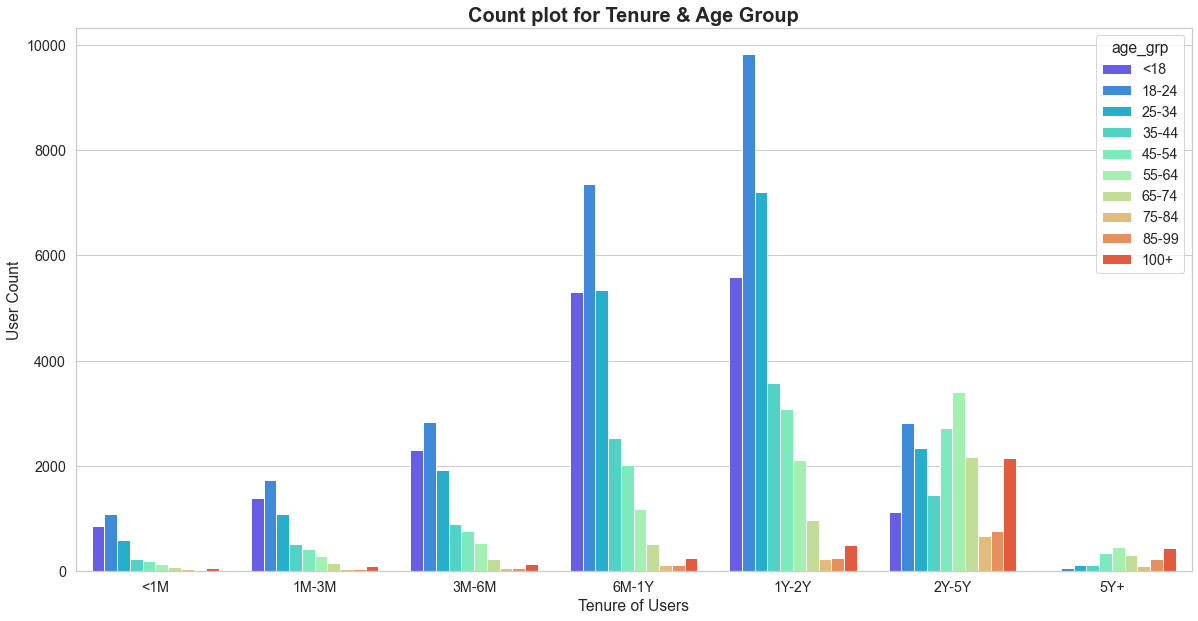

In [114]:

plt.figure(figsize=(20,10))
sns.countplot(x='tenure_grp', hue='age_grp', data=fb_cln, palette="rainbow")
plt.title("Count plot for Tenure & Age Group",fontsize=20,fontweight="bold")
plt.ylabel("User Count")
plt.xlabel("Tenure of Users")

##### Here we observe following things - 
- **Most user counts** are in Tenure group **between 1 yrs to 2 Yrs**.

##### Visualizing with user count distribution based on Age Group & Tenure 

Text(0.5, 0, 'Tenure of Users')

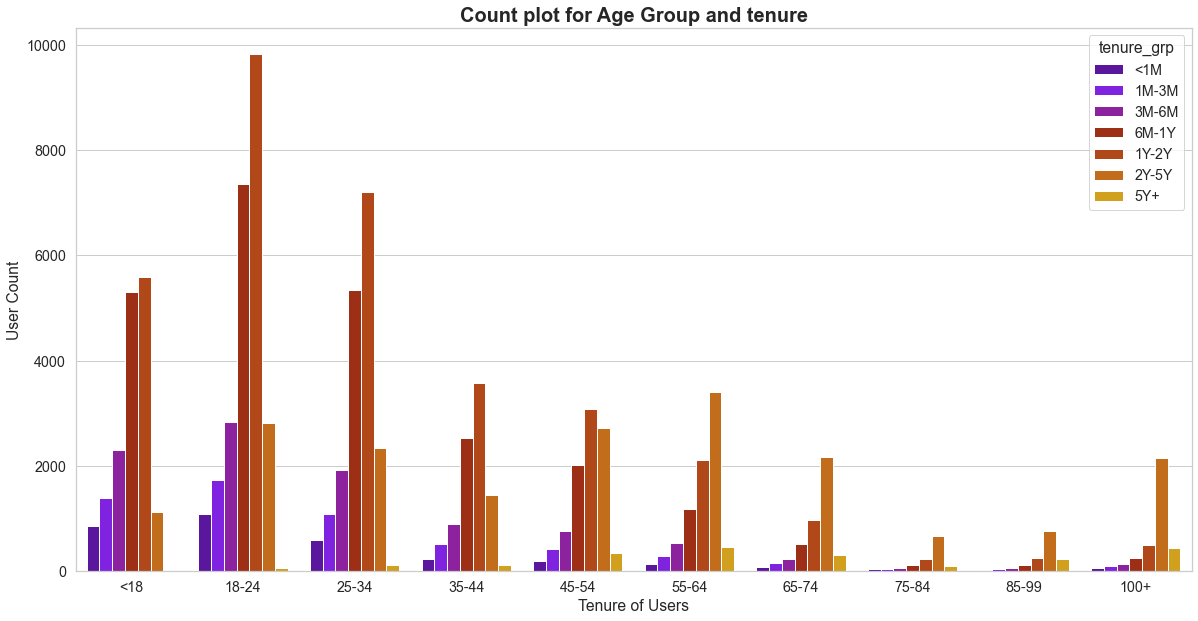

In [27]:

plt.figure(figsize=(20,10))
sns.countplot(x='age_grp', hue='tenure_grp', data=fb_cln, palette="gnuplot")
plt.title("Count plot for Age Group and tenure",fontsize=20,fontweight="bold")
plt.ylabel("User Count")
plt.xlabel("Tenure of Users")

##### Here we observe following things - 
- **Most user counts** are in age group **between 18 yrs to 24 Yrs**.

# <a id=section602></a>
## 6.2 Visualizing the data as percentage distribution

#### Visualizing the Gender, Age & Tenure as %age to get the insight about distribution based on them

First we will start with **Gender Distribution by %age**

Text(0.5, 1.0, '%age of Male & Female Distribution')

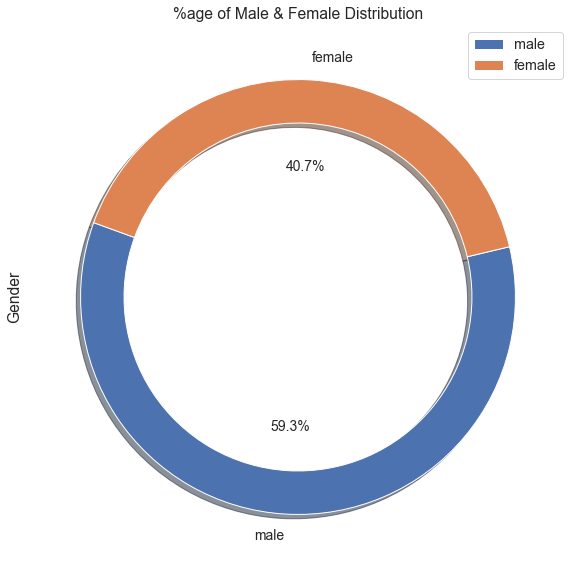

In [40]:
fb_cln['gender'].value_counts().plot(kind='pie',fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.20), 
                                       shadow=True, startangle=160, figsize=(10,10),  legend=True)

plt.ylabel('Gender')
plt.title('%age of Male & Female Distribution')

##### Here we observe following things - 
- There are **more Male users than Female users**.

We will now find **Age Group Distribution by %age**

Text(0.5, 1.0, '%age of Age group Distribution')

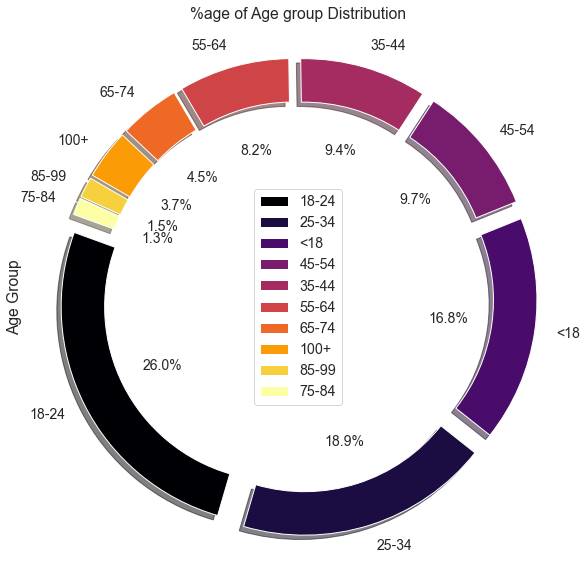

In [36]:
space = np.ones(10)/10
fb_cln['age_grp'].value_counts().plot(kind='pie',explode=space,  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.20), 
                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=True)

plt.ylabel('Age Group')
plt.title('%age of Age group Distribution')

##### Here we observe following things - 
- **Highest number of users** are aged **between 18 to 24 years**

- Around **64% users are less then 34 years** old.

We will now find **Tenure Distribution by %age**

Text(0.5, 1.0, '%age of Tenure of Usage')

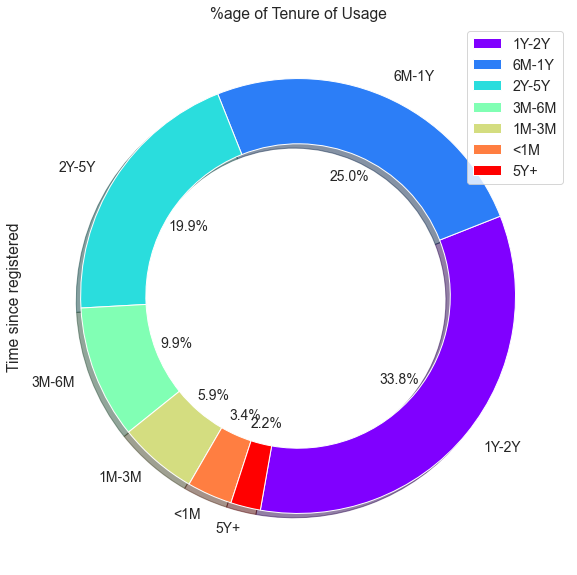

In [38]:
fb_cln['tenure_grp'].value_counts().plot(kind='pie',   fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.30), 
                                       shadow=True, startangle=260, figsize=(15,10), cmap='rainbow', legend=True)

plt.ylabel('Time since registered')
plt.title('%age of Tenure of Usage')

##### Here we observe following things - 
- Around **53% of users** are between **6 months to 2 years**. These are significantly new users.

- We have **very less users with Tenure > 5 years**.

# <a id=section603></a>
## 6.3 Visualizing the activity data as percentage distribution

#### Visualizing the activity based on Gender, Age & Tenure as %age

Here we are considering 4 main parameters for analysing the data. They are **'friend_count','friendships_initiated','likes', 'likes_received'**. 

Lets start with visualizing **all 4 parameters** as **percentage of Gender**.

Text(0.5, 1.0, 'likes_received')

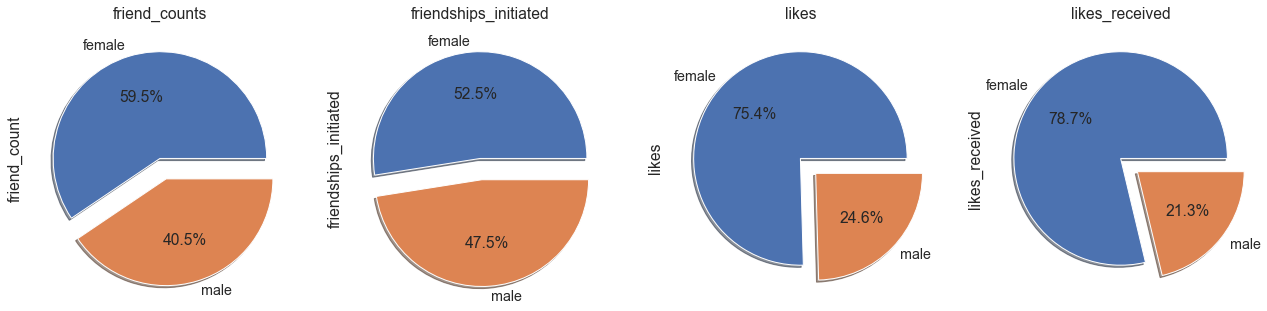

In [56]:
f,ax = plt.subplots(1,4,figsize=(22,7))
fb_cln.groupby(['gender'])['friend_count'].mean().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
fb_cln.groupby(['gender'])['friendships_initiated'].mean().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
fb_cln.groupby(['gender'])['likes'].mean().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
fb_cln.groupby(['gender'])['likes_received'].mean().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[3],shadow=True)
ax[0].set_title('friend_counts')
ax[1].set_title('friendships_initiated')
ax[2].set_title('likes')
ax[3].set_title('likes_received')

##### Here we observe following things - 
- Females have **more friends count and more frienship requests initiated** compared to Males.

- Females have **significantly high percentage** of activities **likes and likes received** compared th their male counterparts.

#### Now we will take combination of Gender and Age group to analyze the percentage distribution of all 4 Activity parameters.

Since the groups have now increased significantly we cannot plot a regular pie plot. Hence will draw a **doughnut chart** for **each activity parameter one by one**.

Text(0.5, 1.0, '%age of Friends count wrt Gender & Age Group')

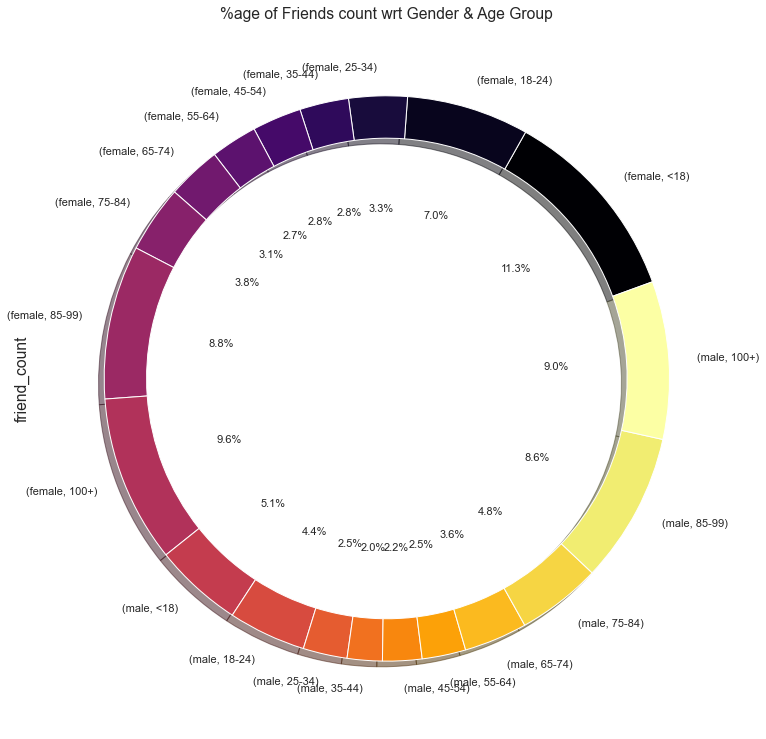

In [103]:
fb_cln.groupby(['gender', 'age_grp'])['friend_count'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                figsize=(13,13), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='inferno')
plt.title('%age of Friends count wrt Gender & Age Group')

##### Here we observe following things - 
- Top 3 categories for number of friend counts are **Females < 18, Females > 100 & Males > 100**.



Text(0.5, 1.0, '%age of Friendships Initiated wrt Gender & Age Group')

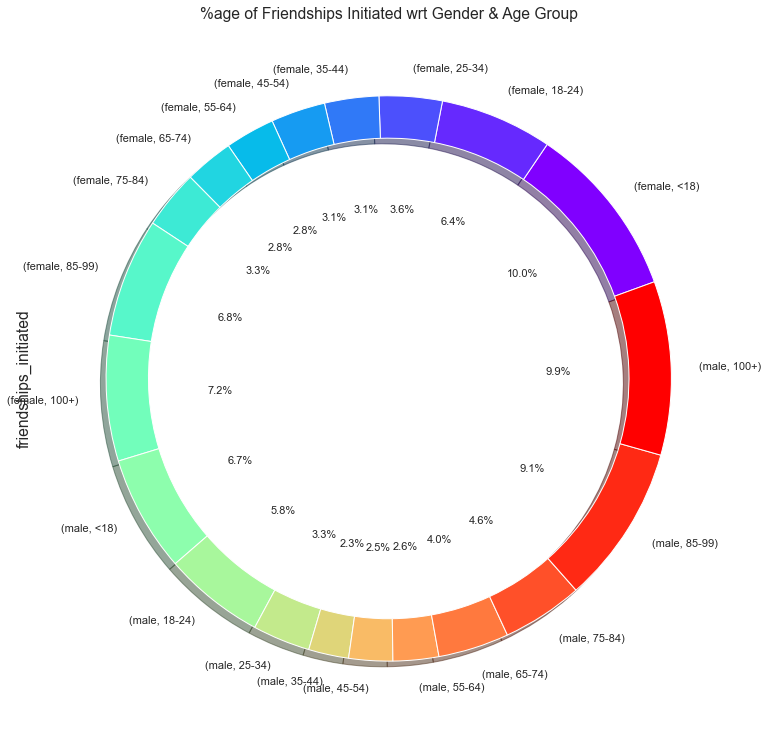

In [104]:
fb_cln.groupby(['gender', 'age_grp'])['friendships_initiated'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                figsize=(13, 13), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='rainbow')

plt.title('%age of Friendships Initiated wrt Gender & Age Group')

##### Here we observe following things - 
- Top 3 categories for number of friendship Initiated are **Females < 18, Males > 100 & Males between 85 & 99**.

Text(0.5, 1.0, '%age of Likes wrt Gender & Age Group')

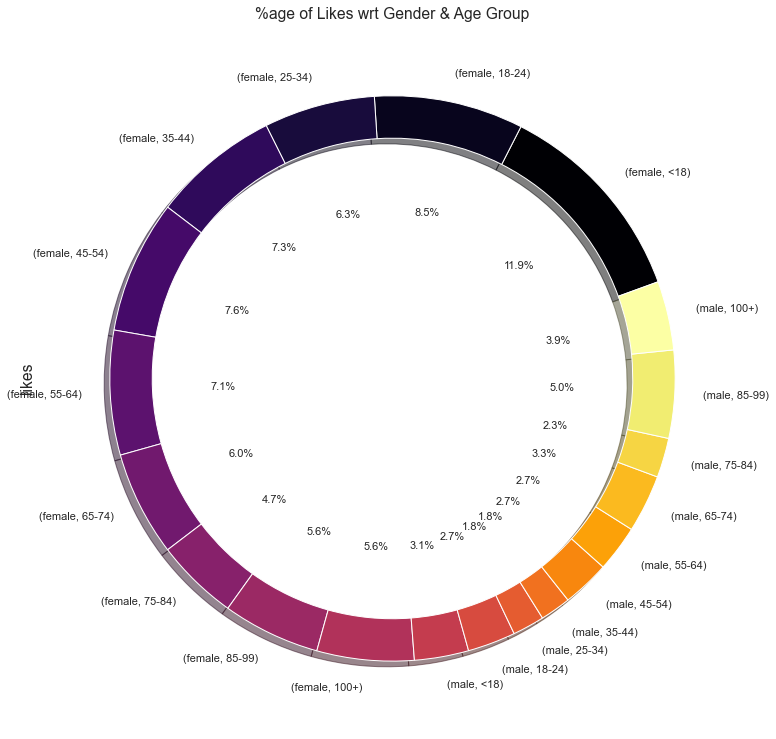

In [105]:
fb_cln.groupby(['gender', 'age_grp'])['likes'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                figsize=(13, 13), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='inferno')

plt.title('%age of Likes wrt Gender & Age Group')


##### Here we observe following things - 
- Top 3 categories for number of likes are **Females < 18, Females between 18 to 24 & Females between 45 & 54**.

Text(0.5, 1.0, '%age of Likes received wrt Gender & Age Group')

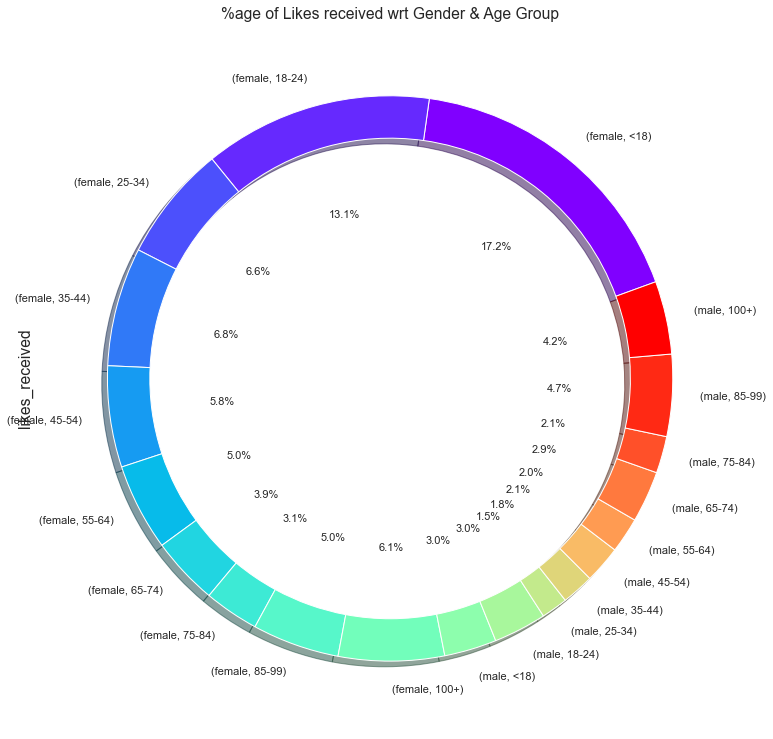

In [106]:
fb_cln.groupby(['gender', 'age_grp'])['likes_received'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                figsize=(13, 13), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='rainbow')

plt.title('%age of Likes received wrt Gender & Age Group')

##### Here we observe following things - 
- Top 3 categories for number of likes received are **Females < 18, Females between 18 to 24 and Females between 35 & 44**.

#### Now we will take combination of Gender and Tenure group to analyze the percentage distribution of all 4 Activity parameters.

Since the number of groups have now increased significantly we cannot plot a regular pie plot. Hence will draw a **doughnut chart** for **each activity parameter one by one**.

Text(0.5, 1.0, '%age of Friend counts wrt Gender & Tenure')

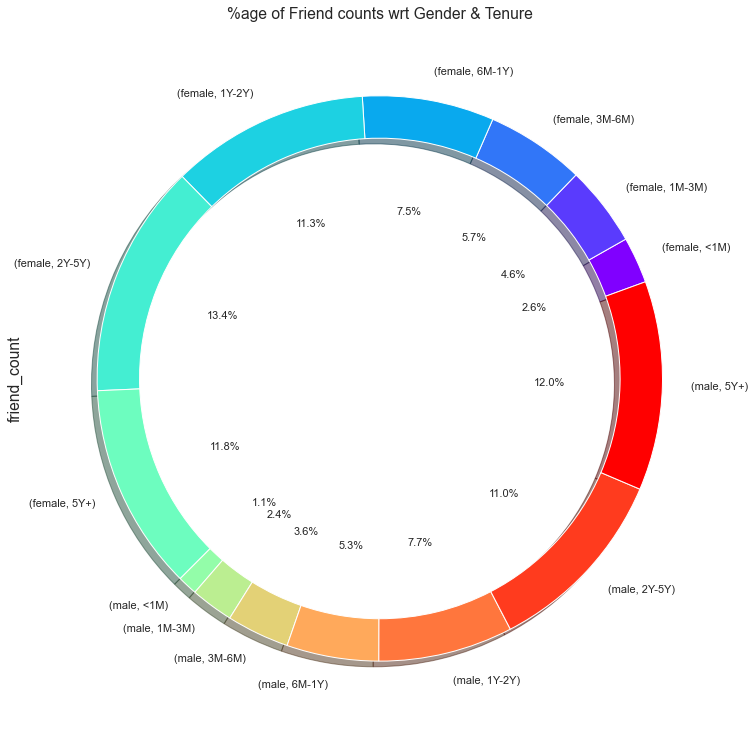

In [107]:
fb_cln.groupby(['gender', 'tenure_grp'])['friend_count'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                figsize=(13, 13), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='rainbow')

plt.title('%age of Friend counts wrt Gender & Tenure')

##### Here we observe following things - 
- Top 3 categories for number of friend counts are **Females with Tenure between 1 to 2 years, Males with Tenure of 5+ years & Females with Tenure of 5+ Years**.

Text(0.5, 1.0, '%age of Friendships Initiated wrt Gender & Tenure')

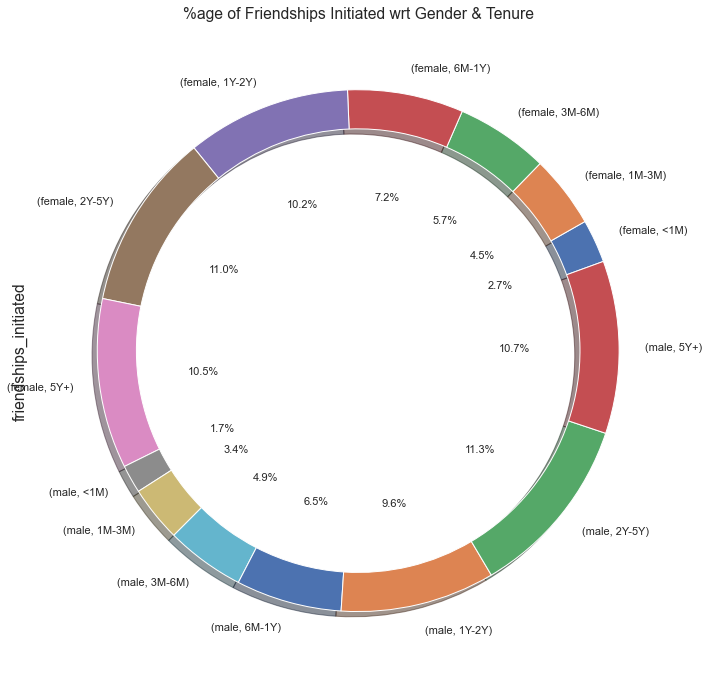

In [111]:
fb_cln.groupby(['gender', 'tenure_grp'])['friendships_initiated'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                figsize=(13, 12), fontsize=11, 
                                                                 startangle=20, shadow=True, )

plt.title('%age of Friendships Initiated wrt Gender & Tenure')

##### Here we observe following things - 
- Top 3 categories for number of friendship initiated are **Males with Tenure between 2 to 5 years, Females with Tenure of 2 to 5 Years & Males with Tenure of 5+ Years**.

Text(0.5, 1.0, '%age of Likes wrt Gender & Tenure')

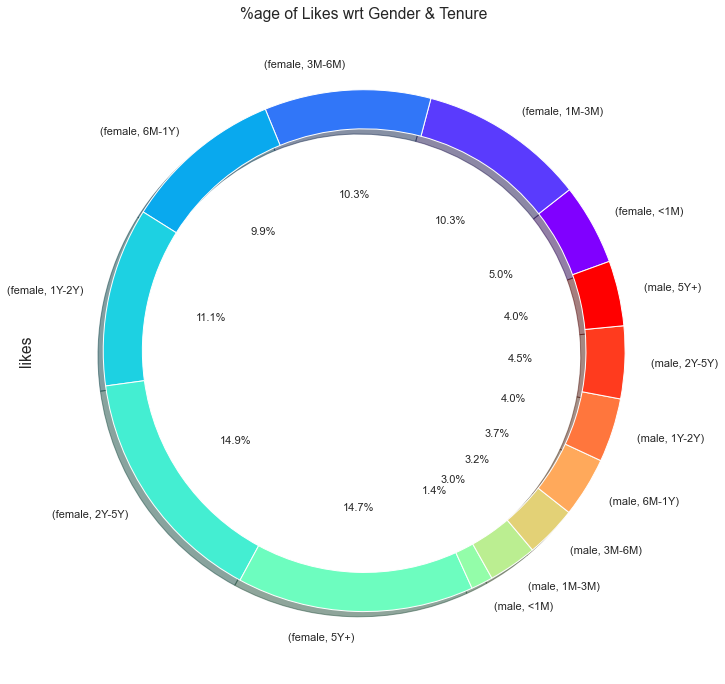

In [109]:
fb_cln.groupby(['gender', 'tenure_grp'])['likes'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                figsize=(13, 12), fontsize=11, 
                                                                 startangle=20, shadow=True, cmap='rainbow')

plt.title('%age of Likes wrt Gender & Tenure')

##### Here we observe following things - 
- Top 3 categories for number of Likes given are **Females with Tenure between 2 to 5 years, Females with Tenure of 5+ Years & Females with Tenure between 1 and 2 Years**.

Text(0.5, 1.0, '%age of Likes received wrt Gender & Tenure')

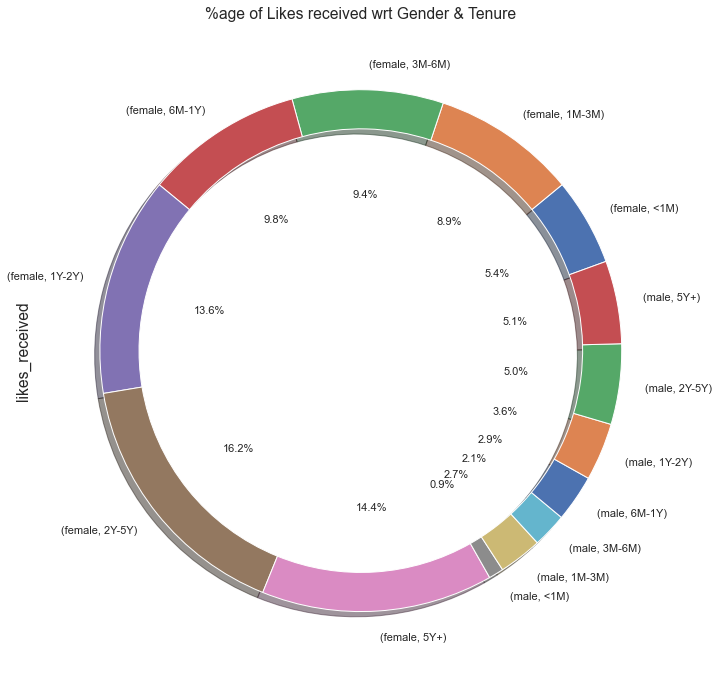

In [110]:
fb_cln.groupby(['gender', 'tenure_grp'])['likes_received'].mean().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                                                figsize=(13, 12), fontsize=11, 
                                                                 startangle=20, shadow=True, )

plt.title('%age of Likes received wrt Gender & Tenure')

##### Here we observe following things - 
- Top 3 categories for number of Likes Received are **Females with Tenure between 2 to 5 years, Females with Tenure of 5+ Years & Females with Tenure between 1 and 2 Years**.

# <a id=section604></a>
## 6.4 Visualizing the data using Boxplots


User analysis **of activity based on Gender, Age Group and Tenure grouping**

Here we are considering 2 main parameters for analysing the data. They are **'friend_count' and 'friendships_initiated'**. Other parameters of activity are extremely skewed and won't fit in boxplot.

First lets analyze the  **'friend_count' distribution based on Gender**.

Text(0.5, 1.0, 'Friend_count vs Gender')

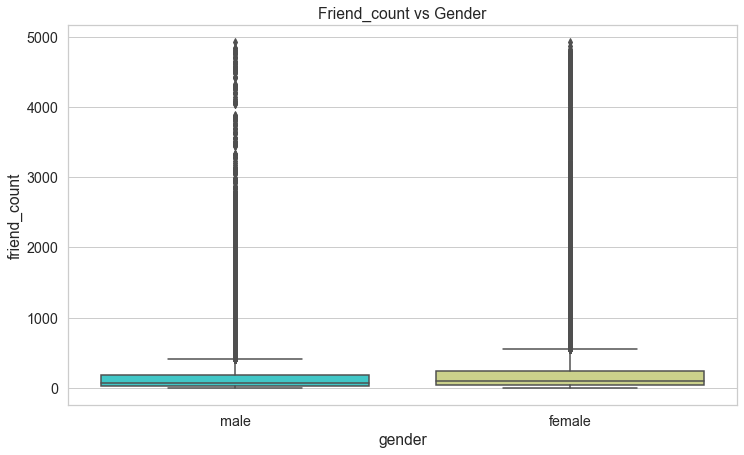

In [172]:

plt.figure(figsize=(12,7))
sns.boxplot(data=fb_cln, x='gender', y='friend_count', palette='rainbow')

plt.title('Friend_count vs Gender')

##### Here we observe following things - 
- Females have more friend count.

- Both genders have significant number of outliers indicating that the very few users are active and makeing most numbers of friends. Majority of them are hardly using the social media platform.

Lets analyze the  **'friend_count' distribution based on Age Group**

Text(0.5, 1.0, 'Friend_count vs Age Group')

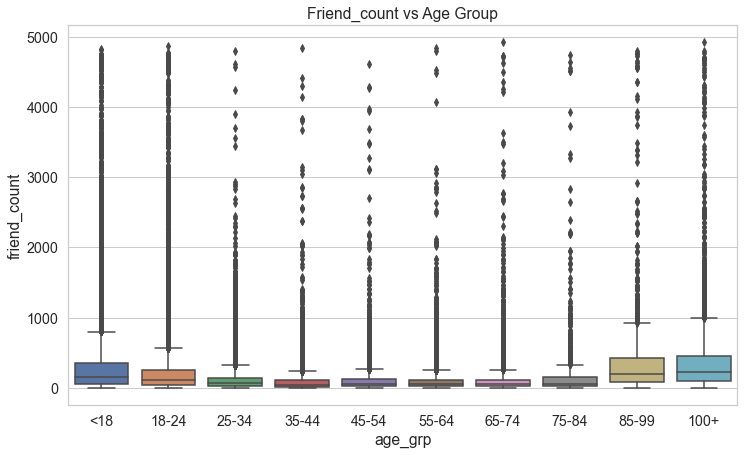

In [173]:
plt.figure(figsize=(12,7))
sns.boxplot(data=fb_cln, x='age_grp', y='friend_count', )

plt.title('Friend_count vs Age Group')

##### Here we observe following things - 
- Two significan groups emerge who have a good number fo friend counts. They are **age<24 & age>85**.

- All age groups have significant number of outliers indicating that the very few users are active and makeing most number of friends. Majority of them are hardly using the social media platform.

Lets analyze the  **'friend_count' distribution based on Tenure**

Text(0.5, 1.0, 'Friend_count vs Tenure Group')

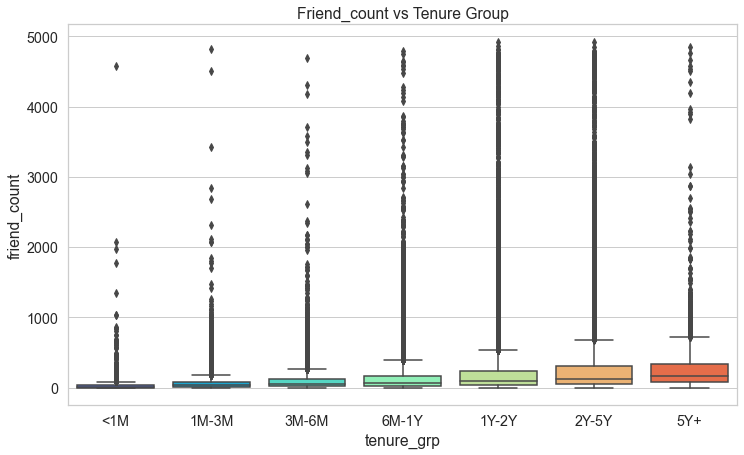

In [174]:
plt.figure(figsize=(12,7))
sns.boxplot(data=fb_cln, x='tenure_grp', y='friend_count', palette='rainbow')

plt.title('Friend_count vs Tenure Group')

##### Here we observe following things - 
- There is constant increase in friend counts with tenure.

- All Tenure groups have significant number of outliers indicating that the very few users are active and makeing most number of friends. Majority of them are hardly using the social media platform.

Lets analyze the  **'friendships_initiated' distribution based on Gender**

Text(0.5, 1.0, 'Friendship Initiated vs Gender')

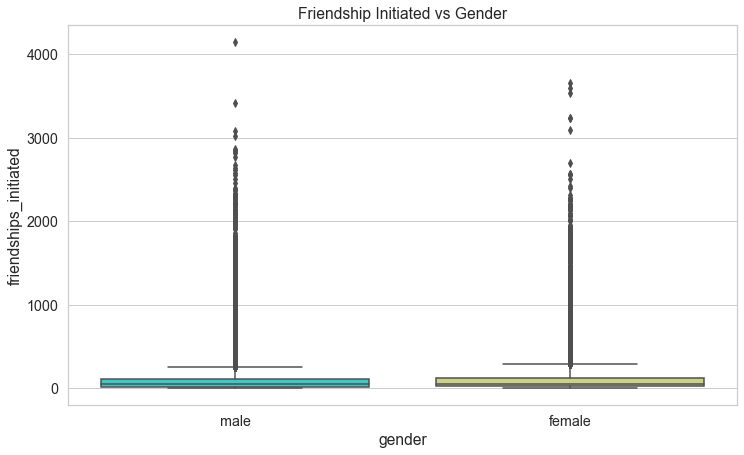

In [176]:
plt.figure(figsize=(12,7))
sns.boxplot(data=fb_cln, x='gender', y='friendships_initiated', palette='rainbow')
plt.title('Friendship Initiated vs Gender')


##### Here we observe following things - 
- Both gender almost equally initiate friend requests. 

- Both genders have significant number of outliers indicating that the very few users are active and makeing most numbers of friends request. Majority of them are hardly using the social media platform.

Lets analyze the  **'friendships_initiated' distribution based on Age Group**

Text(0.5, 1.0, 'Friendship Initiated vs Age Group')

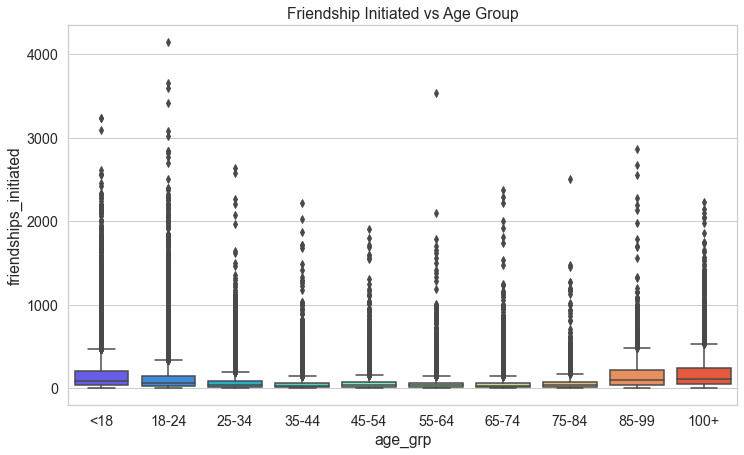

In [178]:
plt.figure(figsize=(12,7))
sns.boxplot(data=fb_cln, x='age_grp', y='friendships_initiated', palette='rainbow')
plt.title('Friendship Initiated vs Age Group')


##### Here we observe following things - 
- Two significan groups emerge who have initiated good number fo friend requests. They are **age<24 & age>85**.

- All age groups have significant number of outliers **specially users between age 18 and 24** indicating that very few users are active and initiating most number of friend requests. Majority of them are hardly using the social media platform.

Lets analyze the  **'friendships_initiated' distribution based on Tenure**

Text(0.5, 1.0, 'Friendship Initiated vs Tenure Group')

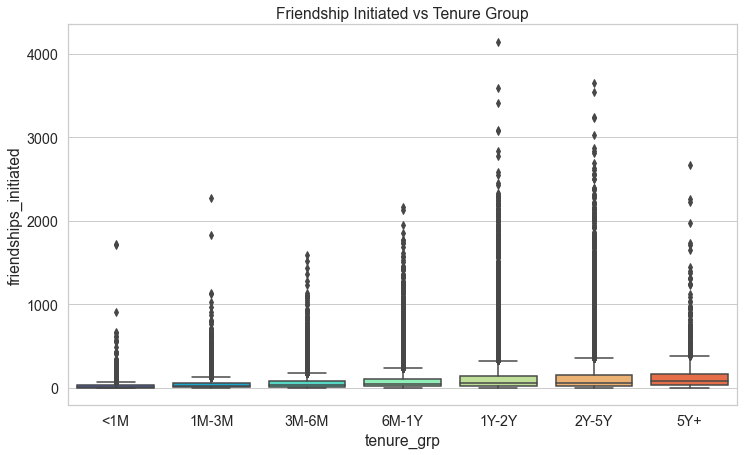

In [179]:
plt.figure(figsize=(12,7))
sns.boxplot(data=fb_cln, x='tenure_grp', y='friendships_initiated', palette='rainbow')
plt.title('Friendship Initiated vs Tenure Group')

##### Here we observe following things - 
- There is constant increase in friendships initiated counts with tenure.

- All Tenure groups have significant number of outliers **specially users between 1 year to 5 year** indicating that very few users are active and initiating most number of friend requests. Majority of them are hardly using the social media platform.

# <a id=section605></a>
## 6.5 Visualizing and analysing the activity data


User analysis **based on relationships between parameters**

Here we are considering 4 main parameters for analysing the data. They are **'friend_count','friendships_initiated','likes', 'likes_received'**. 

First lets analyze the relation between these 4 parametrs **using pair plot**

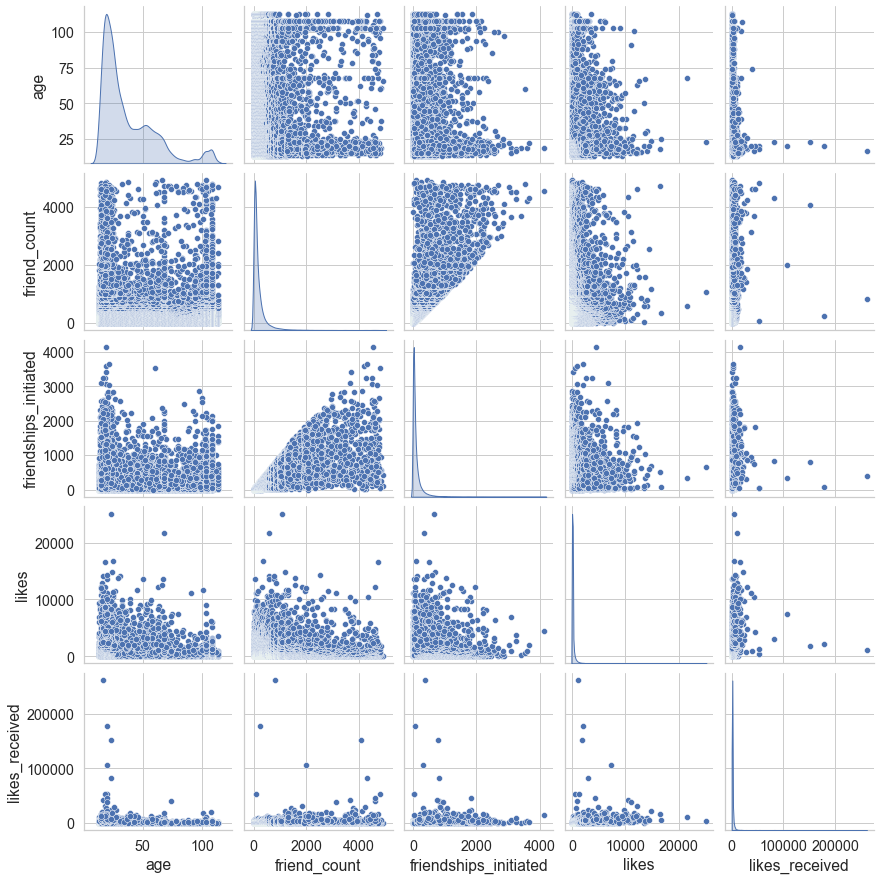

In [115]:
#sns.pairplot(data=fb_cln[['age','friend_count', 'friendships_initiated', 'likes','likes_received']], size=2.5, diag_kind='kde')

sns.pairplot(data=fb_cln[['age','friend_count', 'friendships_initiated', 'likes','likes_received']],\
              palette="seismic_r", height=2.5, diag_kind='kde')

##### Here we observe following things - 
- Activity is significantly higher for young users .

- Maximum users are young. There is significan tactivity at older age too.


Now lets analyze the relation between these all numerical variables **using heat map**

<AxesSubplot:>

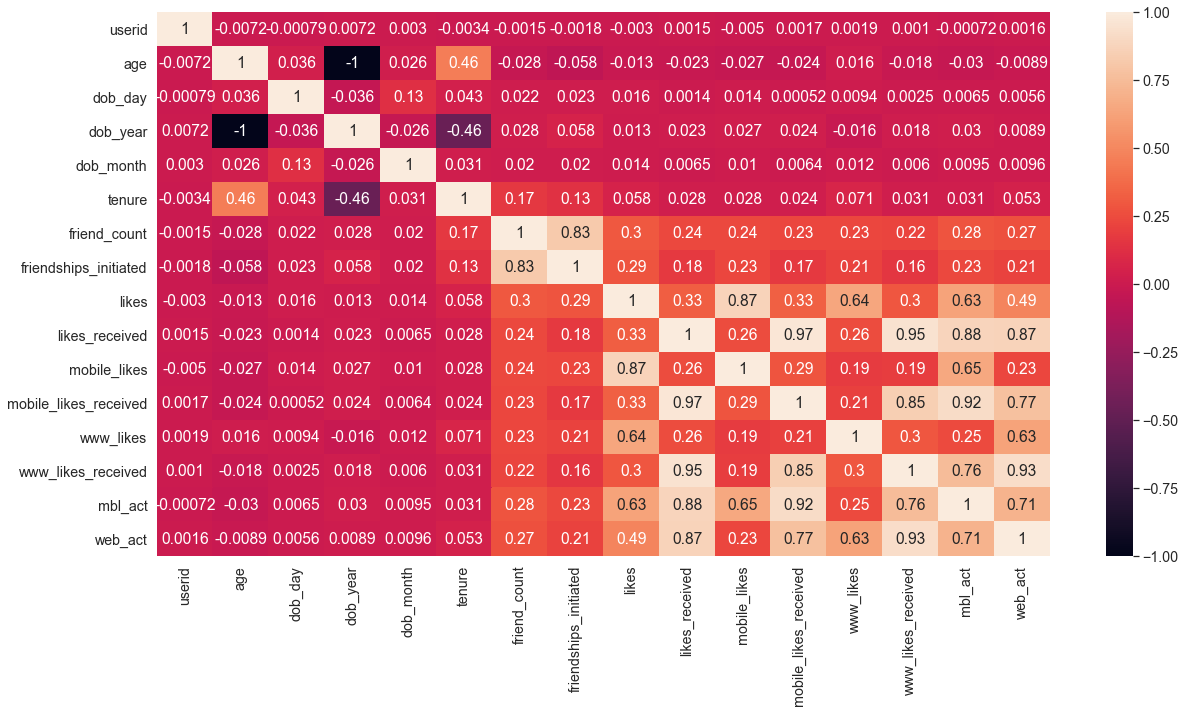

In [28]:
corr_mat = fb_cln.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, annot=True)
#sns.heatmap(corr_mat, cmap='viridis')

##### Here we observe following things - 
- friend count and friendship intiated are highly correlated.

- Likes and likes received are positively correlated.

- Likes are more positively correlated to mobile likes then to website likes, showing more mobile activity then website.

- On the other hand Likes received are highly correlated to both mobile likes received and website likes received.

# <a id=section606></a>
## 6.6 Visualizing the activity data using stacked plots


User analysis **based on Gender, Age Group and Tenure grouping**

Here we are considering 4 main paraameters for analysing the data. They are **'friend_count','friendships_initiated','likes', 'likes_received'**. Other then this we will also analyze the 4 dependent variables namely **'mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received'**. Latter don't hold much significance in this section but will be utilzed more in the next section.

**First we will start with analysis of these parameters wrt Gender**



<AxesSubplot:xlabel='gender'>

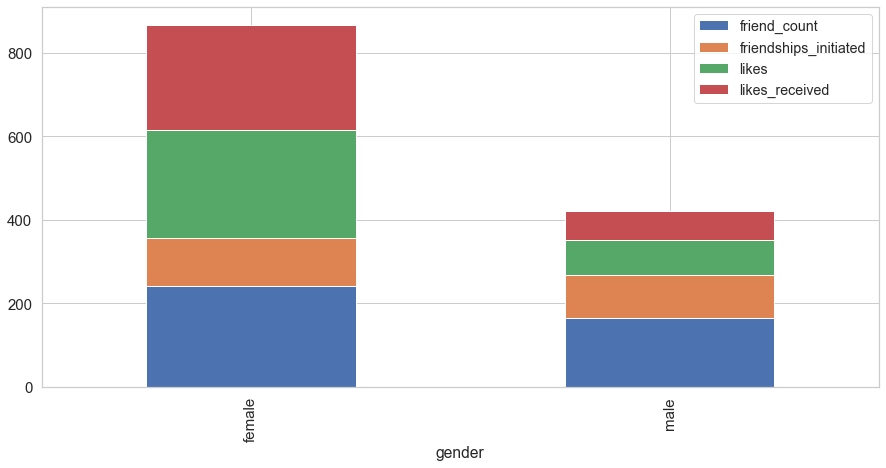

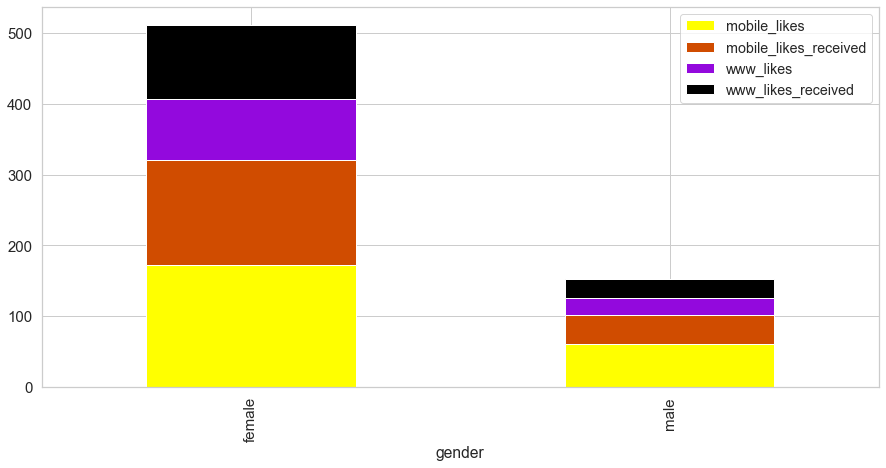

In [77]:
fb_stats = fb_cln.groupby(['gender']).mean()[['friend_count','friendships_initiated','likes', 'likes_received',]]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15,)

fb_stats = fb_cln.groupby(['gender']).mean()[['mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15, cmap='gnuplot_r')



##### Here we observe following things - 
- Females are more active then males.

- Females have more friends count then males.

- Females and males have initiatd almost equal numbers of friendship request.

- Females have initiated significantly higher number of Like  and have received significantly higher number of likes then compared to the male users.

**Now, we will start analysis of these parameters wrt Age Group**

<AxesSubplot:xlabel='age_grp'>

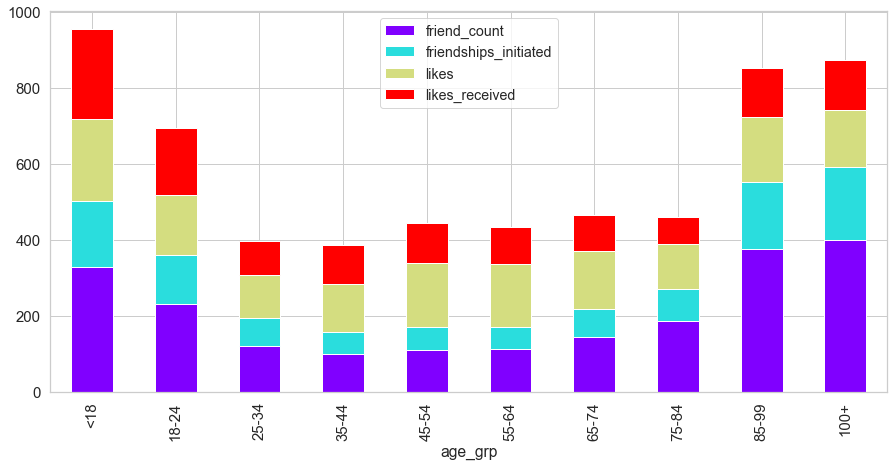

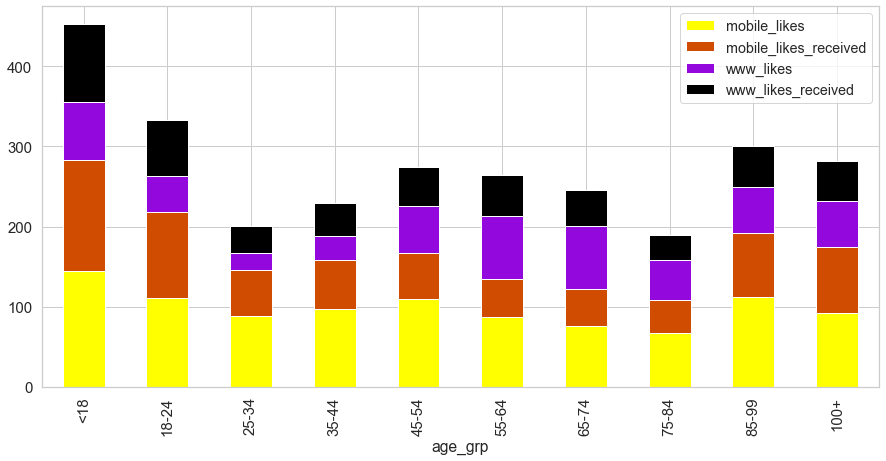

In [78]:
fb_stats = fb_cln.groupby(['age_grp']).mean()[['friend_count','friendships_initiated','likes', 'likes_received',]]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15, cmap='rainbow')

fb_stats = fb_cln.groupby(['age_grp']).mean()[['mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15, cmap='gnuplot_r')


##### Here we observe following things - 
- Users less then 24 years of age and old people above 85 are the most active users.

- Hence for above users both friend counts, frienship intiated, likes and likes received are significantly larger then other age groups.

- Within above 2 user categories friend count is higher for 85+ users, friendship intiation is almost equal.

- Likes & likes received  are higher for users under 24 hence they are more active in these activity comapered to other user group of 85+.

**Now, we will start analysis of these parameters wrt Tenure**

<AxesSubplot:xlabel='tenure_grp'>

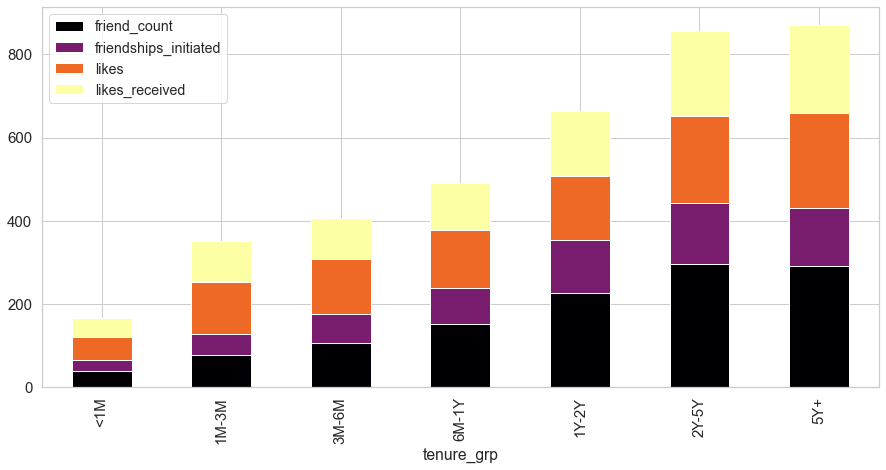

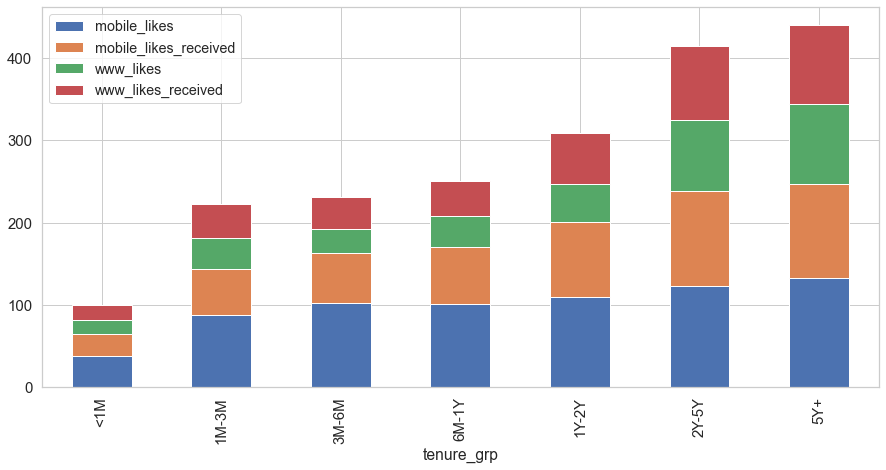

In [79]:
fb_stats = fb_cln.groupby(['tenure_grp']).mean()[['friend_count','friendships_initiated','likes', 'likes_received',]]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15,cmap='inferno')

fb_stats = fb_cln.groupby(['tenure_grp']).mean()[['mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15, )

##### Here we observe following things - 
- We can clearly see the trend that as the user tenure is increasing all the activities are increasing propotionally.

**Now, we will start analysis of these parameters wrt Gender & Age Group**

<AxesSubplot:xlabel='gender,age_grp'>

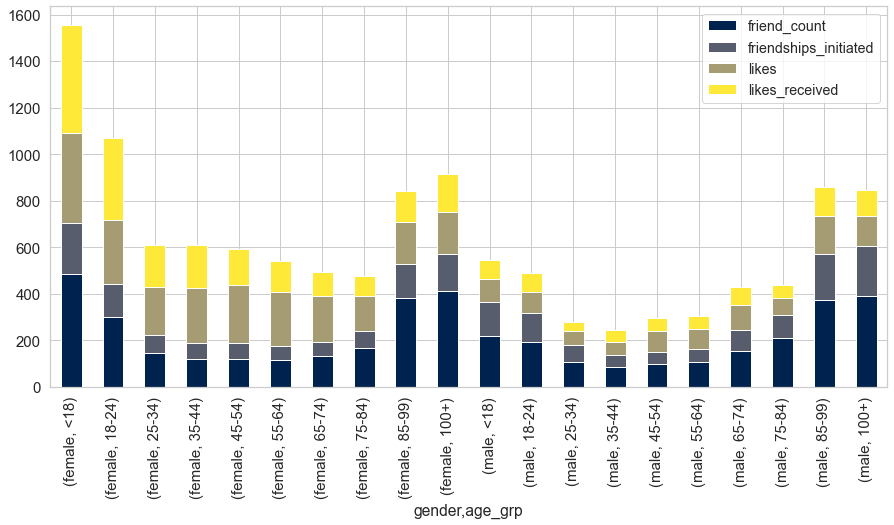

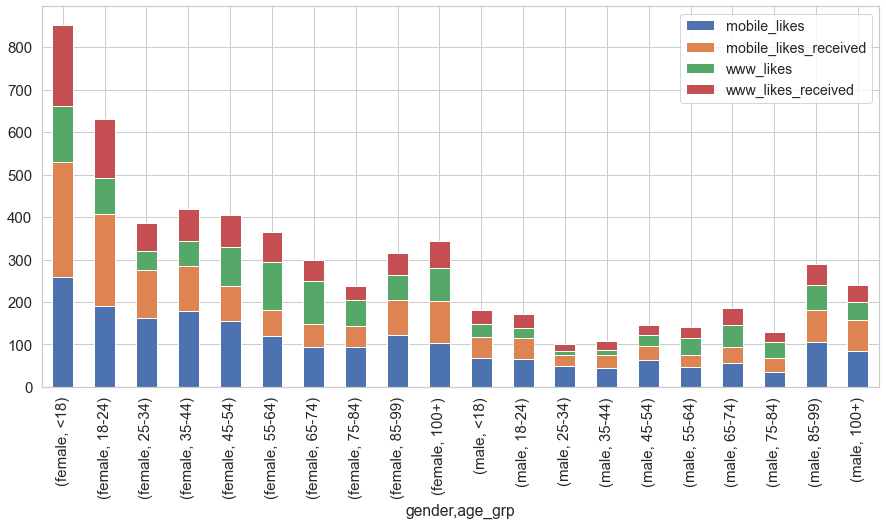

In [81]:
fb_stats = fb_cln.groupby(['gender', 'age_grp']).mean()[['friend_count','friendships_initiated','likes', 'likes_received',]]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15, cmap='cividis')

fb_stats = fb_cln.groupby(['gender', 'age_grp']).mean()[['mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15)


##### Here we observe following things - 
- We can clearly see the trend that female user <24 are the most active users in all 4 parameters.

- Within all user groups we see theat Females under 18 are the most active user in all 4 parameters.

- Both males and females over 85+ year of age are very active users after the first group identified above.

**Now, we will start analysis of these parameters wrt Gender & Tenure**

<AxesSubplot:xlabel='gender,tenure_grp'>

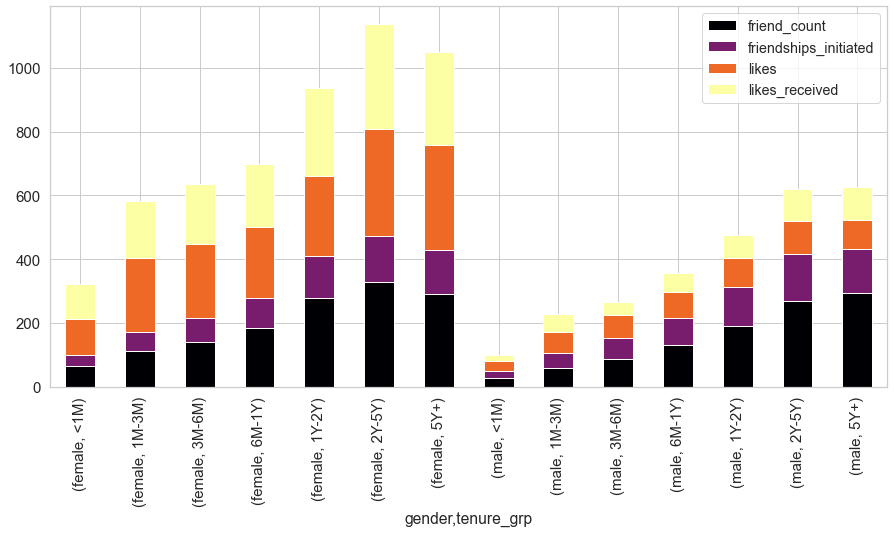

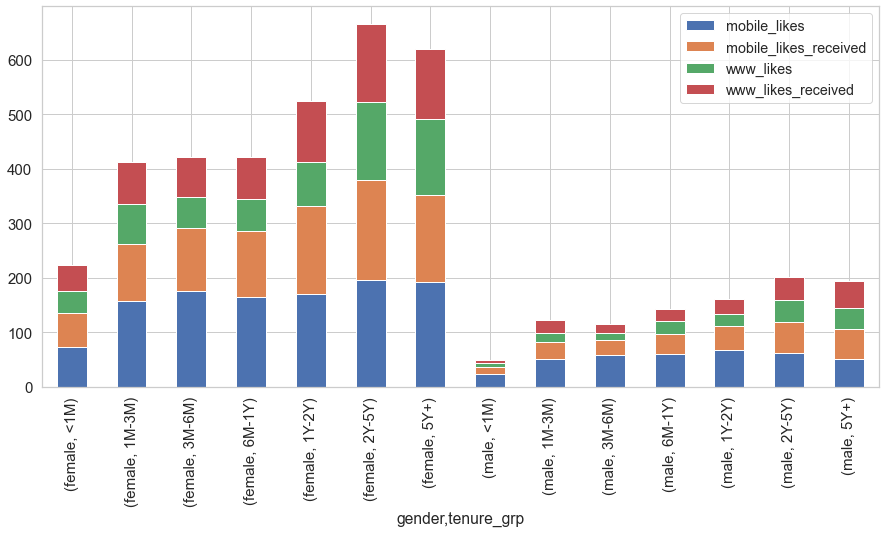

In [93]:
fb_stats = fb_cln.groupby(['gender', 'tenure_grp']).mean()[['friend_count','friendships_initiated','likes', 'likes_received',]]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15,cmap='inferno')

fb_stats = fb_cln.groupby(['gender', 'tenure_grp']).mean()[['mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15, )

##### Here we observe following things - 
- Here we can clearly see the trend that as the user tenure is increasing all the activities are increasing propotionally for both males and females.

- Level of activity is significantly higher in females compared to males wrt to tenure.

**Now, we will start analysis of these parameters wrt Age Group & Tenure**

<AxesSubplot:xlabel='age_grp,tenure_grp'>

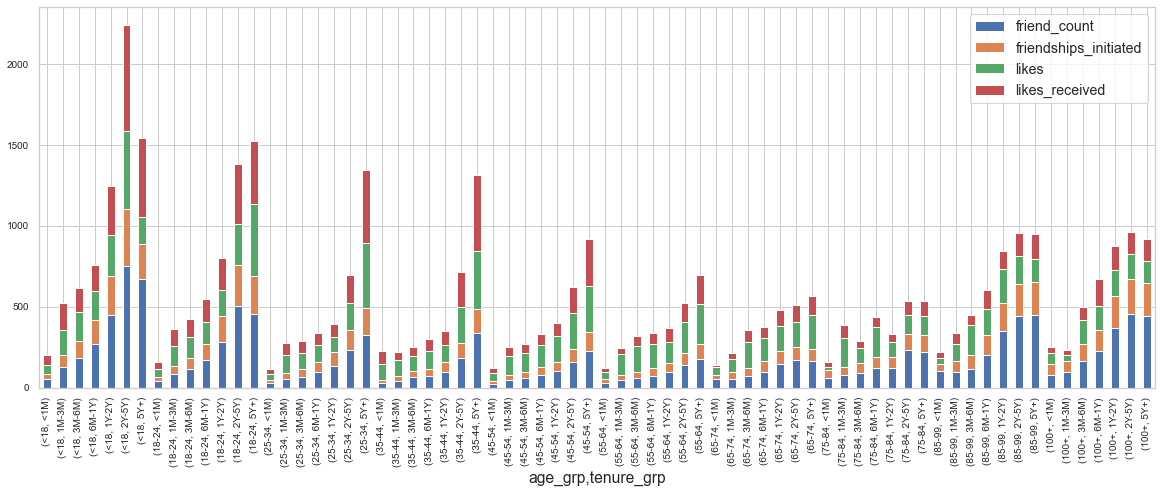

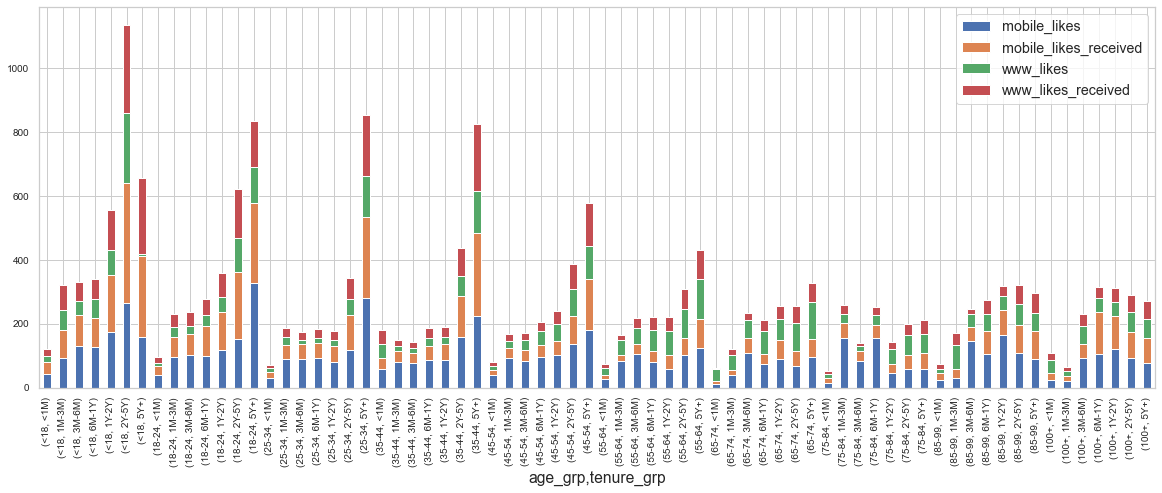

In [97]:
fb_stats = fb_cln.groupby(['age_grp', 'tenure_grp']).mean()[['friend_count','friendships_initiated','likes', 'likes_received',]]
fb_stats.plot.bar(stacked=True, figsize=(20, 7), fontsize=10)

fb_stats = fb_cln.groupby(['age_grp', 'tenure_grp']).mean()[['mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']]
fb_stats.plot.bar(stacked=True, figsize=(20, 7), fontsize=10 )

##### Here we observe following things - 
- We can clearly see the most active group is users under 18 who have been around for 2 to 5 years.

- In all other user age groups the most active group is with tenure greater then 5 years.

- For old age group users activity is comparable despite of tenure except for new users(<6M).

**Now, we will start analysis of these parameters wrt Gender, Age Group & Tenure**

<AxesSubplot:xlabel='gender,age_grp,tenure_grp'>

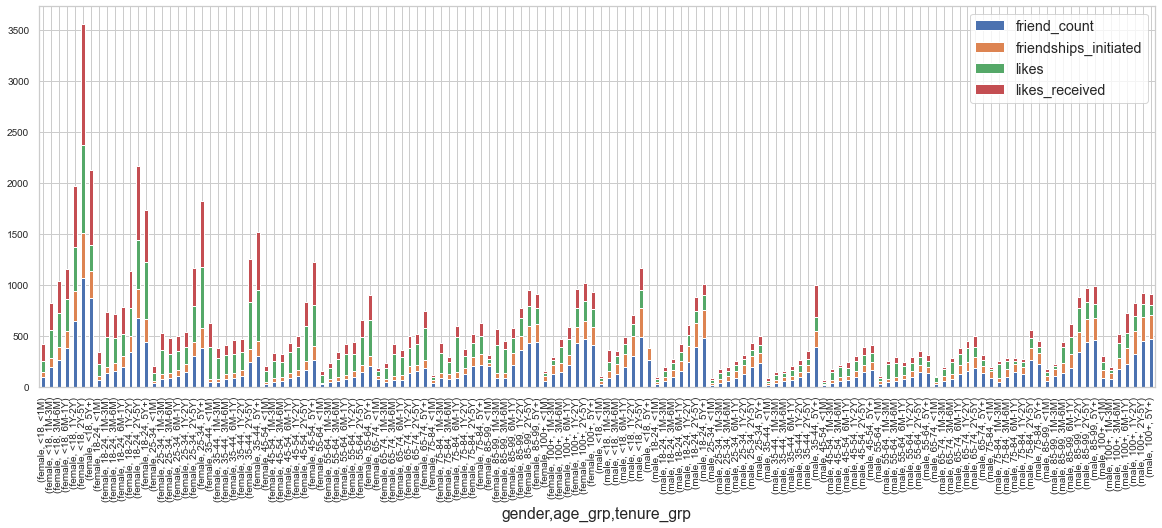

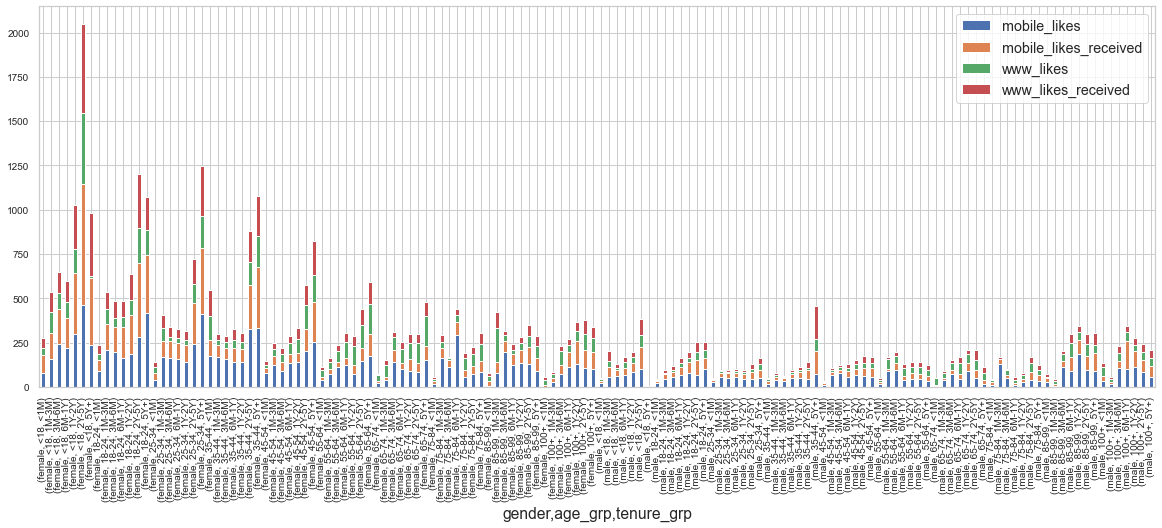

In [101]:
fb_stats = fb_cln.groupby(['gender', 'age_grp', 'tenure_grp']).mean()[['friend_count','friendships_initiated','likes', 'likes_received',]]
fb_stats.plot.bar(stacked=True, figsize=(20, 7), fontsize=10)

fb_stats = fb_cln.groupby(['gender', 'age_grp','tenure_grp']).mean()[['mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received']]
fb_stats.plot.bar(stacked=True, figsize=(20, 7), fontsize=10)

##### Here we observe following things - 
- Here we can clearly see the most active group of users is female under 18 who have been around for 2 to 5 years.

- The most active male group is the one aged <18 and has been around for 2 to 5 years.

- Overall, females of all age groups and tenure are more active then corresponding male groups.



# <a id=section605></a>
## 6.5 Analysing the medium of activity data


Analysis of mobile and Web activity **based on Gender, Age Group and Tenure grouping**

#### We will use the stacked bar plot to see the usage of each platform being used by users

<AxesSubplot:xlabel='tenure_grp'>

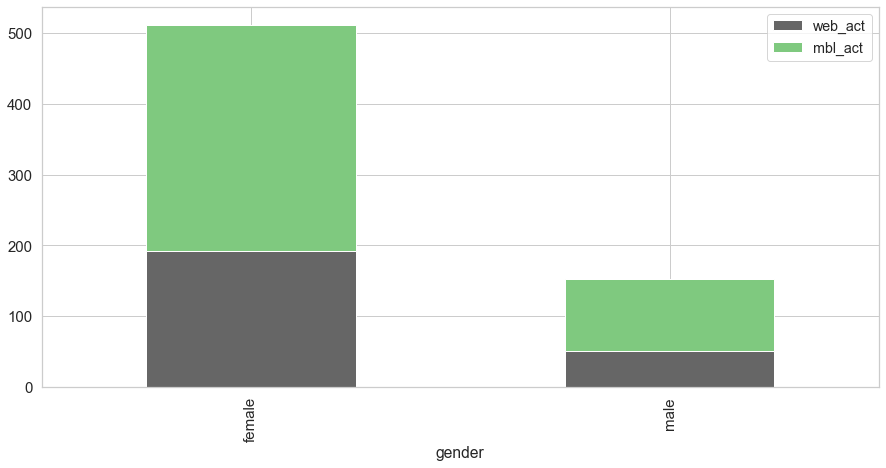

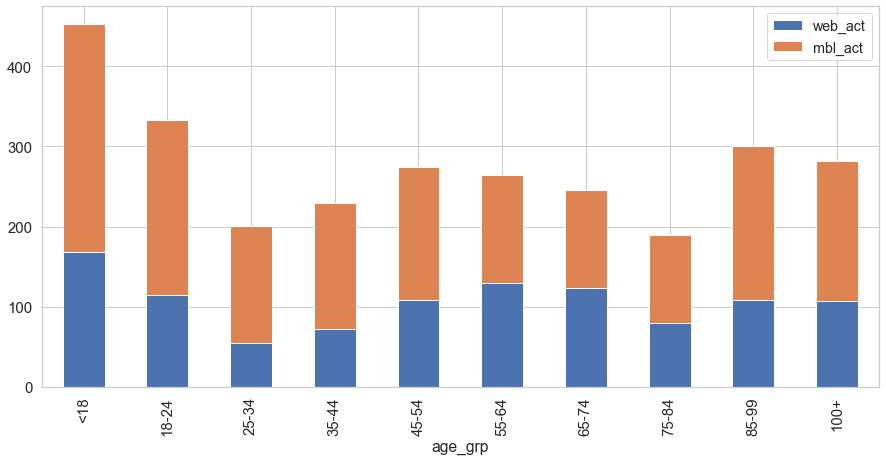

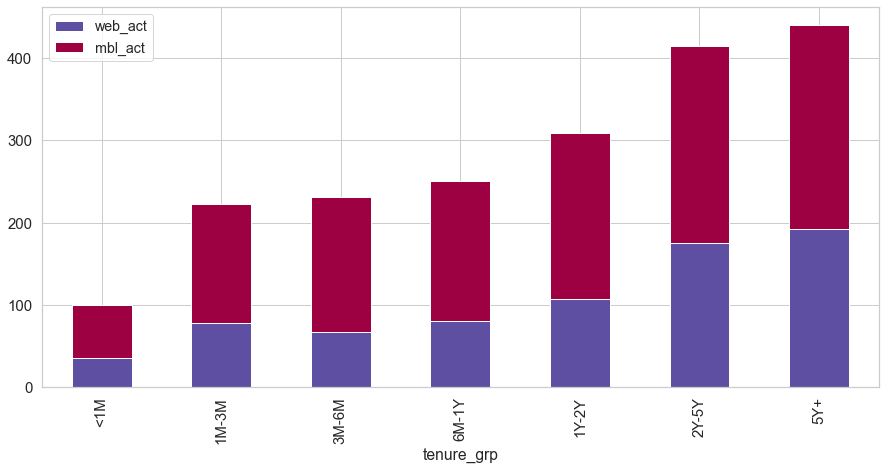

In [171]:
fb_stats = fb_cln.groupby(['gender']).mean()[['web_act','mbl_act',]]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15, cmap='Accent_r')

fb_stats = fb_cln.groupby(['age_grp']).mean()[['web_act','mbl_act',]]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15,)

fb_stats = fb_cln.groupby(['tenure_grp']).mean()[['web_act','mbl_act',]]
fb_stats.plot.bar(stacked=True, figsize=(15, 7), fontsize=15, cmap='Spectral_r')


##### Here we observe following things - 

- We can clearly see that irrespective of Gender, Age Group or Tenure group, mobile activity is significantly higher then the web activity. So we can clearly see users are using mobile app more then the website.

- We can also see that as the user tenure is increasing there is propotional increase in website usage.

Now we will try to see the **%age of users doing mobile and web activity** based on **Gender, Age Group and Tenure**

Text(0.5, 1.0, 'Mobile Activity')

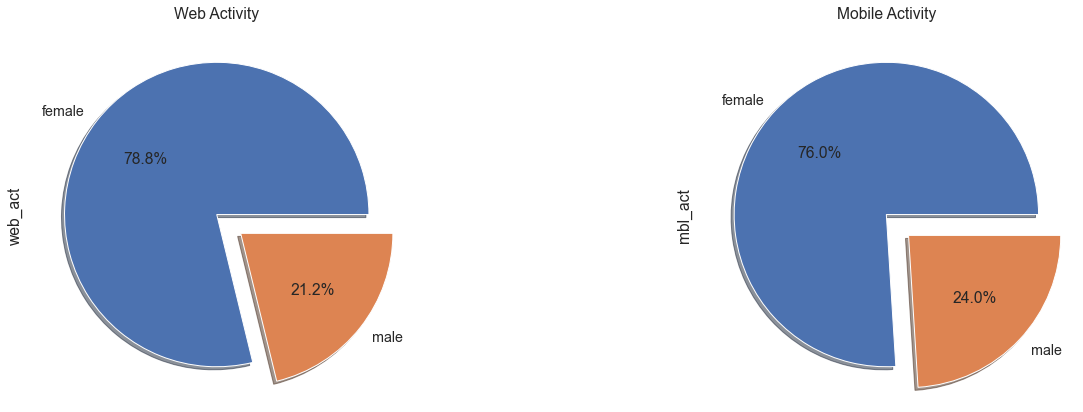

In [82]:
f,ax = plt.subplots(1,2,figsize=(22,7))
fb_cln.groupby(['gender'])['web_act'].mean().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
fb_cln.groupby(['gender'])['mbl_act'].mean().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Web Activity')
ax[1].set_title('Mobile Activity')


Text(0.5, 1.0, 'Mobile Activity')

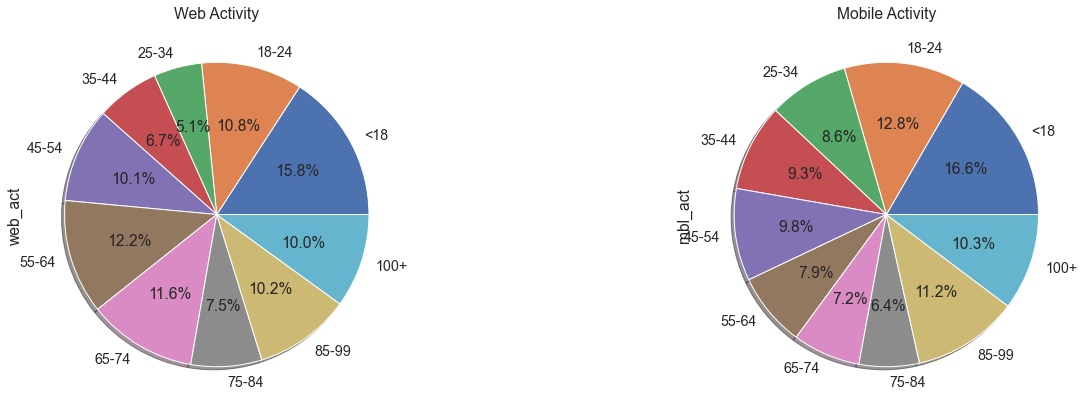

In [84]:
f,ax = plt.subplots(1,2,figsize=(22,7))
fb_cln.groupby(['age_grp'])['web_act'].mean().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
fb_cln.groupby(['age_grp'])['mbl_act'].mean().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Web Activity')
ax[1].set_title('Mobile Activity')

Text(0.5, 1.0, 'Mobile Activity')

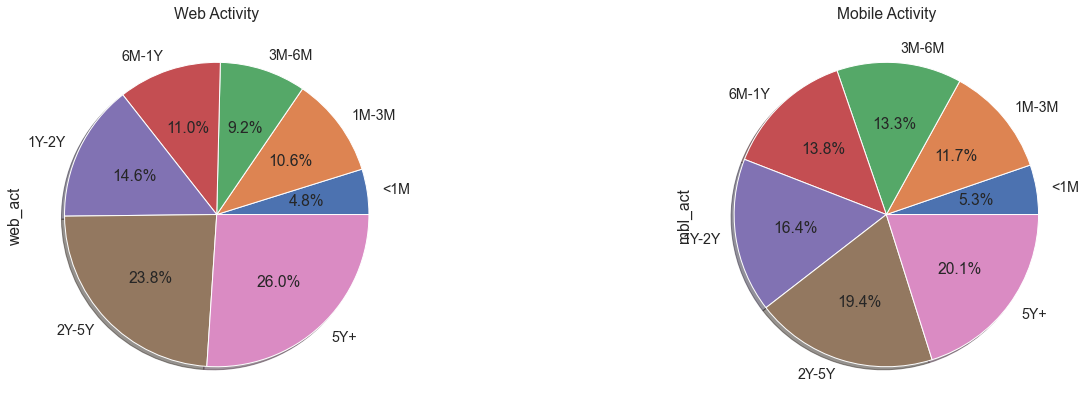

In [102]:
f,ax = plt.subplots(1,2,figsize=(22,7))
fb_cln.groupby(['tenure_grp'])['web_act'].mean().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
fb_cln.groupby(['tenure_grp'])['mbl_act'].mean().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)

ax[0].set_title('Web Activity')
ax[1].set_title('Mobile Activity')

##### Here we observe following things - 
- We can clearly see that based on Gender the mobile and website activity is significantly higher for Females

- Also we see that irrespective of Age Group mobile activity and web activity are equally distributed across groups.

- Also based on or Tenure, we can see that for users greater then 2 year plus use Website more then mobile.

# <a id=section7></a>
## 7. Conclusion

###### Following are the observations - 

- There are **more numbers of male users** then female users. But **majority of users** have very very low activity.

- The maximum user base is that between the tenure range of **1 years to 2 Years**.

- The maximum user base is that between the age group of **18 years to 24 Years**.

- Majority of the social media activity namely **'friend_count','friendships_initiated','likes', 'likes_received'** is being done by 10% of the users.

- Female users are **significantly more active** then male users. **Specially those less then age 24 Years**.

- There are many users **above age 85** who are very active and have good amount of friend counts and activity.

- We can clearly see that **irrespective of Gender, Age Group or Tenure group,** mobile activity is significantly **higher** then the web activity. So we can conclude that **mobile app is being used more then the website.**

# <a id=section8></a>
## 8. Actionable Insights

##### Following are the actionable Insights based on EDA - 

- Some **incentive based user campaign** needs to be launched for age and Gender specific groups, so that the **activity of dormant and low activity users can be increased**. Resulting in **more advertisement revenues.**

- Facebook mobile app needs to be **constantly upgraded** and have to be **at par with current trends** as maximum number of users are **using the app for their activity.**

- New **facebook games/application/advertising** should be created for the most active user group ie **young adults < 24** and also for **old users > 75**. As both the users have more free time compared to other age group users. **Increased activity** by these 2 user group will result in **more advertisement revenues generated** for Facebook.